<a href="https://colab.research.google.com/github/whyonce/testgit/blob/main/Seven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'/content/drive/MyDrive/Colab Notebooks/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
=3


In [3]:
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/news_summarization/data/Reviews.csv", nrows=100000)
#깃헙 기준
#data = pd.read_csv("news_summarization/data/Reviews.csv")
#구글 코랩 기준
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/news_summarization/data/Reviews.csv", encoding='utf-8')
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 568454


In [ ]:
import chardet
filename = "/content/drive/MyDrive/Colab Notebooks/news_summarization/data/Reviews.csv"
filename1 = "/content/drive/MyDrive/Colab Notebooks/news_summary_more.csv"
with open(filename, 'rb') as f:
    result = chardet.detect(f.readline())
    result1 = chardet.detect(f.readline())

In [ ]:
print(result['encoding'])
print(result1['encoding'])

ascii
ascii


In [ ]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [ ]:
data = data[['Text','Summary']]
data.head()

#랜덤한 15개 샘플 출력
data.sample(15)

Text  \
417692  I ordered six Cavendish MonkeyChews and a Cave...   
36812   We have tried other brands of coconut milk and...   
53563   My dog loves these treats & I was happy to fin...   
559223  This item was damaged when delivered. It was a...   
160472  Arrived super quick and very well packaged. No...   
178391  Ok, so I've been a fan of salts lately. Citrus...   
477694  Because of a dairy allergy, we've been a soymi...   
31383   My sister told me about these great treats for...   
487748  I bought this flavor of Fancy Feast Kibble for...   
197086  The flavor of both the lemon and ginger cookie...   
439770  Probably the best dried fruit I've ever had. I...   
401719  The  G.F. cookie mixes were awesome but was di...   
418061  As a busy mom, I find myself running out of ti...   
528127  I started giving my baby this food when he was...   
237814  This tea is completely tasteless. It was as if...   

                                            Summary  
417692                             Chew the monkey.  
36812                             Best Coconut Milk  
53563                          Dog's favorite treat  
559223                        broken when delivered  
160472                              Gotta try this!  
178391  Bargain Truffle Salt? I have to see this...  
477694                              Not recommended  
31383                       Dog and ownder approved  
487748                       My cats beg me for it!  
197086                 Texture counts a lot in food  
439770                     Just like the real thing  
401719                           The Cravings Place  
418061                             Love this stuff!  
528127                                 awasome food  
237814                         Tastes like nothing.

In [ ]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 393579
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 295742


In [ ]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['Text'], inplace=True)
print('전체 샘플수 :', (len(data)))
print(data.isnull().sum())

전체 샘플수 : 393579
Text       0
Summary    3
dtype: int64


In [ ]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 393576


In [ ]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [ ]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [ ]:
data[data['Summary'].str.contains('Ã')]

Text  \
289510  The Nescafe Dolce Gusto capsule carousel holds...   

                                      Summary  
289510  NescafÃ© Dolce Gusto Capsule Carousel

In [ ]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


In [ ]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [ ]:
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])
clean_summary = []
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['Summary']:
    clean_summary.append(preprocess_sentence(s, False))

print("Summary 전처리 후 결과: ", clean_summary[:5])

Text 전처리 후 결과:  ['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better', 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo', 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch', 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal', 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']
Summary 전처리 후 결과:  ['good quality dog food', 'not as advertised', 'delight says it all', 'cough medicine', 'great taffy']


In [ ]:
temp = data.copy()
temp['Text'] = clean_text
temp['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
temp.replace('', np.nan, inplace=True)
print('=3')

=3


In [ ]:
temp.isnull().sum()
temp.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(temp)))

전체 샘플수 : 88355


In [ ]:
text_max_len = 50
summary_max_len = 8
print('=3')

=3


In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [ ]:
below_threshold_len(text_max_len, temp['Text'])
below_threshold_len(summary_max_len,  temp['Summary'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7745119121724859
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


In [ ]:
temp = temp[temp['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
temp = temp[temp['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :', (len(temp)))

전체 샘플수 : 65818


In [ ]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
temp['decoder_input'] = temp['Summary'].apply(lambda x : 'sostoken '+ x)
temp['decoder_target'] = temp['Summary'].apply(lambda x : x + ' eostoken')
temp.head()

Text                Summary  \
0  bought several vitality canned dog food produc...  good quality dog food   
1  product arrived labeled jumbo salted peanuts p...      not as advertised   
2  confection around centuries light pillowy citr...    delight says it all   
3  looking secret ingredient robitussin believe f...         cough medicine   
4  great taffy great price wide assortment yummy ...            great taffy   

                    decoder_input                  decoder_target  
0  sostoken good quality dog food  good quality dog food eostoken  
1      sostoken not as advertised      not as advertised eostoken  
2    sostoken delight says it all    delight says it all eostoken  
3         sostoken cough medicine         cough medicine eostoken  
4            sostoken great taffy            great taffy eostoken

In [ ]:
encoder_input = np.array(temp['Text']) # 인코더의 입력
decoder_input = np.array(temp['decoder_input']) # 디코더의 입력
decoder_target = np.array(temp['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [ ]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[31653 64610  5118 ... 17734 53154 58066]


In [ ]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [ ]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 13163


In [ ]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 52655
훈련 레이블의 개수 : 52655
테스트 데이터의 개수 : 13163
테스트 레이블의 개수 : 13163


In [ ]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [ ]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 32067
등장 빈도가 6번 이하인 희귀 단어의 수: 23816
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8251
단어 집합에서 희귀 단어의 비율: 74.26949823806406
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.4040502813089013


In [ ]:
src_tokenizer.word_counts.keys()

odict_keys(['one', 'best', 'deserts', 'ever', 'ridiculous', 'exact', 'product', 'available', 'websites', 'great', 'fun', 'eat', 'freak', 'kids', 'like', 'mushrooms', 'taste', 'smoooth', 'choco', 'leave', 'hot', 'car', 'mushroom', 'patch', 'still', 'good', 'tasting', 'tried', 'pink', 'lemonade', 'flavor', 'today', 'long', 'run', 'unbelievably', 'awesome', 'tasted', 'stomach', 'issues', 'sticking', 'teeth', 'water', 'required', 'wash', 'importantly', 'time', 'cannot', 'wait', 'try', 'flavors', 'extremely', 'happy', 'milk', 'creamer', 'makes', 'delicious', 'cappuccino', 'would', 'say', 'quality', 'drink', 'get', 'coffee', 'shop', 'restaurant', 'better', 'definitely', 'buy', 'english', 'toffee', 'firm', 'chewy', 'stay', 'way', 'age', 'begins', 'soften', 'know', 'old', 'past', 'sell', 'date', 'printed', 'container', 'quite', 'disappointment', 'les', 'jones', 'exactly', 'described', 'nice', 'several', 'different', 'blueberry', 'change', 'price', 'want', 'grow', 'sprouts', 'saves', 'bundle', 

In [ ]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('=3')

=3


In [ ]:
encoder_input_train

array(['one best deserts ever ridiculous exact product available websites',
       'great fun eat freak kids like mushrooms taste great smoooth choco leave hot car choco mushroom patch fun still good tasting',
       'tried pink lemonade flavor today long run unbelievably awesome tasted great stomach issues sticking teeth water required wash importantly best run long time cannot wait try flavors',
       ...,
       'wow got stuck every tooth mouth tasty amazingly filling small brush well good',
       'chili paste ultimate best hot sauce ever tried searching years add unecessary fillers spices ground chili peppers weak heart',
       'received box chocolate pleased box excellent shape wrapped well candies fresh delicious would get'],
      dtype=object)

In [ ]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[7, 15, 73, 1912, 1542, 5, 235, 6441], [3, 654, 31, 4641, 192, 1, 1844, 4, 3, 4388, 603, 71, 1043, 4388, 3068, 7691, 654, 78, 2, 130], [24, 1300, 1561, 9, 681, 127, 472, 5053, 323, 134, 3, 480, 766, 1952, 308, 66, 2292, 1626, 2639, 15, 472, 127, 20, 49, 532, 30, 75]]


In [ ]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('=3')

=3


In [ ]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10497
등장 빈도가 5번 이하인 희귀 단어의 수: 8132
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2365
단어 집합에서 희귀 단어의 비율: 77.469753262837
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.914383812449112


In [ ]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 71, 18, 281], [1, 229, 10, 4], [1, 41], [1, 26, 16], [1, 208, 813, 1555]]
target
decoder  [[71, 18, 281, 2], [229, 10, 4, 2], [41, 2], [26, 16, 2], [208, 813, 1555, 2]]


In [ ]:
tar_tokenizer.word_index

{'sostoken': 1,
 'eostoken': 2,
 'great': 3,
 'good': 4,
 'the': 5,
 'not': 6,
 'for': 7,
 'best': 8,
 'love': 9,
 'and': 10,
 'my': 11,
 'it': 12,
 'coffee': 13,
 'tea': 14,
 'this': 15,
 'product': 16,
 'delicious': 17,
 'but': 18,
 'is': 19,
 'very': 20,
 'taste': 21,
 'of': 22,
 'to': 23,
 'dog': 24,
 'yummy': 25,
 'excellent': 26,
 'flavor': 27,
 'these': 28,
 'tasty': 29,
 'like': 30,
 'price': 31,
 'favorite': 32,
 'ever': 33,
 'in': 34,
 'food': 35,
 'too': 36,
 'loves': 37,
 'stuff': 38,
 'snack': 39,
 'so': 40,
 'awesome': 41,
 'dogs': 42,
 'are': 43,
 'with': 44,
 'as': 45,
 'on': 46,
 'just': 47,
 'chocolate': 48,
 'healthy': 49,
 'yum': 50,
 'perfect': 51,
 'better': 52,
 'you': 53,
 'free': 54,
 'wonderful': 55,
 'them': 56,
 'nice': 57,
 'no': 58,
 'tastes': 59,
 'treat': 60,
 'really': 61,
 'have': 62,
 'what': 63,
 'treats': 64,
 'than': 65,
 'sweet': 66,
 'tasting': 67,
 'quality': 68,
 'bad': 69,
 'hot': 70,
 'amazing': 71,
 'buy': 72,
 'chips': 73,
 'at': 74,
 'cup'

In [ ]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1256
삭제할 테스트 데이터의 개수 : 354
훈련 데이터의 개수 : 51399
훈련 레이블의 개수 : 51399
테스트 데이터의 개수 : 12809
테스트 레이블의 개수 : 12809


In [ ]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')
print('=3')

=3


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [ ]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [ ]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 128)      1024000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 50, 256),    394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [ ]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 128)      1024000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 50, 256),    394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
201/201 [==============================] - 801s 4s/step - loss: 2.7027 - val_loss: 2.4382
Epoch 2/50
201/201 [==============================] - 784s 4s/step - loss: 2.3818 - val_loss: 2.2981
Epoch 3/50
201/201 [==============================] - 779s 4s/step - loss: 2.2387 - val_loss: 2.1583
Epoch 4/50
201/201 [==============================] - 772s 4s/step - loss: 2.1176 - val_loss: 2.0669
Epoch 5/50
201/201 [==============================] - 770s 4s/step - loss: 2.0322 - val_loss: 2.0173
Epoch 6/50
201/201 [==============================] - 768s 4s/step - loss: 1.9685 - val_loss: 1.9710
Epoch 7/50
201/201 [==============================] - 770s 4s/step - loss: 1.9150 - val_loss: 1.9378
Epoch 8/50
201/201 [==============================] - 771s 4s/step - loss: 1.8667 - val_loss: 1.9229
Epoch 9/50
201/201 [==============================] - 768s 4s/step - loss: 1.8252 - val_loss: 1.8999
Epoch 10/50
201/201 [==============================] - 770s 4s/step - loss: 1.7873 - val_lo

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('=3')

In [ ]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

pip list | grep summa

In [ ]:
import requests
from summa.summarizer import summarize

In [ ]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005))

In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

In [ ]:
print('Summary:')
print(summarize(text, words=50))

# 이제 다른 csv파일을 가지고 모델을 훈련 시키겠습니다.

In [ ]:
#깃헙 기준
data = pd.read_csv("news_summary_more.csv", encoding='utf-8')
#구글 코랩 기준
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/news_summary_more.csv", encoding='utf-8')
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98401


In [ ]:
data

headlines  \
0      upGrad learner switches to career in ML & Al w...   
1      Delhi techie wins free food from Swiggy for on...   
2      New Zealand end Rohit Sharma-led India's 12-ma...   
3      Aegon life iTerm insurance plan helps customer...   
4      Have known Hirani for yrs, what if MeToo claim...   
...                                                  ...   
98396  CRPF jawan axed to death by Maoists in Chhatti...   
98397  First song from Sonakshi Sinha's 'Noor' titled...   
98398         'The Matrix' film to get a reboot: Reports   
98399  Snoop Dogg aims gun at clown dressed as Trump ...   
98400  Madhesi Morcha withdraws support to Nepalese g...   

                                                    text  
0      Saurav Kant, an alumnus of upGrad and IIIT-B's...  
1      Kunal Shah's credit card bill payment platform...  
2      New Zealand defeated India by 8 wickets in the...  
3      With Aegon Life iTerm Insurance plan, customer...  
4      Speaking about the sexual harassment allegatio...  
...                                                  ...  
98396  A CRPF jawan was on Tuesday axed to death with...  
98397  'Uff Yeh', the first song from the Sonakshi Si...  
98398  According to reports, a new version of the 199...  
98399  A new music video shows rapper Snoop Dogg aimi...  
98400  Madhesi Morcha, an alliance of seven political...  

[98401 rows x 2 columns]

In [ ]:
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())

headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280
text 열에서 중복을 배제한 유일한 샘플의 수 : 98360


In [ ]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))
print(data.isnull().sum())

전체 샘플수 : 98360
headlines    0
text         0
dtype: int64


In [ ]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [ ]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [ ]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

# 1. text 데이터만 불용어 제거

In [ ]:
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])
clean_headlines = []
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['headlines']:
    clean_headlines.append(preprocess_sentence(s, False))

print("Headlines 전처리 후 결과: ", clean_headlines[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

# 2. 둘 다 불용어 제거

In [ ]:
# 데이터 전처리 함수
def preprocess_sentence_2(sentence):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text & Summary)
    tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    return tokens
print('=3')

=3


In [ ]:
clean_text2 = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['text']:
    clean_text2.append(preprocess_sentence_2(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text2[:5])
clean_headlines2 = []
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['headlines']:
    clean_headlines2.append(preprocess_sentence_2(s))

print("Headlines 전처리 후 결과: ", clean_headlines2[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

headlines  \
0      upgrad learner switches to career in ml al wit...   
2      new zealand end rohit sharma led india match w...   
3      aegon life iterm insurance plan helps customer...   
4      have known hirani for yrs what if metoo claims...   
5      rahat fateh ali khan denies getting notice for...   
...                                                  ...   
98396  crpf jawan axed to death by maoists in chhatti...   
98397  first song from sonakshi sinha noor titled uff...   
98398              the matrix film to get reboot reports   
98399  snoop dogg aims gun at clown dressed as trump ...   
98400  madhesi morcha withdraws support to nepalese g...   

                                                    text  \
0      saurav kant alumnus upgrad iiit pg program mac...   
2      new zealand defeated india wickets fourth odi ...   
3      aegon life iterm insurance plan customers enjo...   
4      speaking sexual harassment allegations rajkuma...   
5      pakistani singer rahat fateh ali khan denied r...   
...                                                  ...   
98396  crpf jawan tuesday axed death sharp edged weap...   
98397  uff yeh first song sonakshi sinha starrer upco...   
98398  according reports new version science fiction ...   
98399  new music video shows rapper snoop dogg aiming...   
98400  madhesi morcha alliance seven political partie...   

                                           decoder_input  \
0      sostoken upgrad learner switches to career in ...   
2      sostoken new zealand end rohit sharma led indi...   
3      sostoken aegon life iterm insurance plan helps...   
4      sostoken have known hirani for yrs what if met...   
5      sostoken rahat fateh ali khan denies getting n...   
...                                                  ...   
98396  sostoken crpf jawan axed to death by maoists i...   
98397  sostoken first song from sonakshi sinha noor t...   
98398     sostoken the matrix film to get reboot reports   
98399  sostoken snoop dogg aims gun at clown dressed ...   
98400  sostoken madhesi morcha withdraws support to n...   

                                          decoder_target  
0      upgrad learner switches to career in ml al wit...  
2      new zealand end rohit sharma led india match w...  
3      aegon life iterm insurance plan helps customer...  
4      have known hirani for yrs what if metoo claims...  
5      rahat fateh ali khan denies getting notice for...  
...                                                  ...  
98396  crpf jawan axed to death by maoists in chhatti...  
98397  first song from sonakshi sinha noor titled uff...  
98398     the matrix film to get reboot reports eostoken  
98399  snoop dogg aims gun at clown dressed as trump ...  
98400  madhesi morcha withdraws support to nepalese g...  

[95499 rows x 4 columns]

In [ ]:
data2 = data.copy()

In [ ]:
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)


data2['text'] = clean_text2
data2['headlines'] = clean_headlines2

# 빈 값을 Null 값으로 변환
data2.replace('', np.nan, inplace=True)


In [ ]:
print(data.isnull().sum())
print(data2.isnull().sum())

headlines    0
text         0
dtype: int64
headlines    0
text         0
dtype: int64


# 두 데이터 널값이 없으므로 dropna는 생략하겠습니다

In [ ]:
# 길이 분포 출력
import matplotlib.pyplot as plt

In [ ]:
def showgraph(text, headlines):
  text_len = [len(s.split()) for s in text]
  summary_len = [len(s.split()) for s in headlines]

  print(text_len)
  print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
  print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
  print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
  print('텍스트의 길이 표준편차 : {}'.format(np.std(text_len)))
  print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
  print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
  print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))
  print('요약의 길이 표준편차 : {}'.format(np.std(summary_len)))
  Q3, Q1 = np.percentile(text_len, [75 ,25])
  IQR = Q3 - Q1
  Max = Q3 + 1.5 * IQR
  Min = Q1 - 1.5 * IQR
  print('텍스트 길이 25%, 75% : {0}, {1}'.format(Q1,Q3))
  print('텍스트 길이 IQR 값 : {}'.format(IQR))
  print('최대 텍스트 길이 이상치 : {}'.format(Max))
  print('최소 텍스트 길이 이상치 : {}'.format(Min))
  Q3, Q1 = np.percentile(summary_len, [75 ,25])
  IQR = Q3 - Q1
  Max = Q3 + 1.5 * IQR
  Min = Q1 - 1.5 * IQR
  print('요약 길이 25%, 75% : {0}, {1}'.format(Q1,Q3))
  print('요약 길이 IQR 값 : {}'.format(IQR))
  print('최대 요약길이 이상치 : {}'.format(Max))
  print('최소 요약 길이 이상치 : {}'.format(Min))


  plt.subplot(1,2,1)
  plt.boxplot(text_len)
  plt.title('text')
  plt.subplot(1,2,2)
  plt.boxplot(summary_len)
  plt.title('headlines')
  plt.tight_layout()
  plt.show()

  plt.title('text')
  plt.hist(text_len, bins = 40)
  plt.xlabel('length of samples')
  plt.ylabel('number of samples')
  plt.show()

  plt.title('headlines')
  plt.hist(summary_len, bins = 40)
  plt.xlabel('length of samples')
  plt.ylabel('number of samples')
  plt.show()

[39, 45, 38, 34, 33, 34, 35, 35, 27, 34, 33, 42, 32, 38, 35, 39, 36, 32, 34, 36, 34, 40, 32, 36, 39, 35, 29, 34, 38, 39, 38, 36, 43, 42, 34, 40, 36, 35, 38, 31, 38, 40, 35, 38, 38, 32, 33, 35, 36, 36, 39, 35, 1, 24, 32, 36, 38, 34, 40, 40, 35, 43, 30, 38, 41, 41, 37, 34, 34, 44, 37, 40, 40, 34, 38, 36, 34, 34, 40, 35, 39, 37, 45, 37, 33, 35, 36, 38, 37, 36, 35, 32, 32, 31, 27, 28, 34, 33, 33, 36, 39, 42, 35, 40, 42, 36, 39, 33, 35, 33, 45, 34, 34, 36, 35, 37, 32, 36, 34, 36, 38, 38, 39, 35, 36, 31, 39, 44, 40, 41, 36, 33, 35, 36, 32, 33, 27, 43, 38, 37, 34, 33, 37, 31, 41, 34, 36, 35, 36, 31, 34, 35, 39, 41, 38, 41, 32, 38, 35, 32, 33, 36, 38, 39, 33, 34, 38, 34, 35, 37, 32, 38, 31, 33, 31, 37, 35, 39, 38, 25, 36, 35, 38, 33, 27, 39, 39, 31, 34, 37, 37, 37, 34, 37, 29, 35, 38, 41, 36, 34, 37, 34, 32, 34, 35, 36, 35, 39, 38, 32, 40, 35, 41, 34, 38, 35, 36, 40, 38, 34, 27, 33, 35, 35, 33, 37, 38, 38, 34, 38, 32, 41, 34, 36, 28, 31, 35, 36, 37, 32, 40, 33, 41, 33, 36, 38, 35, 37, 45, 36, 

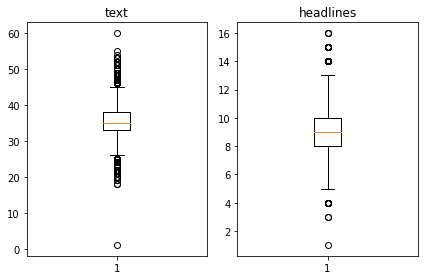

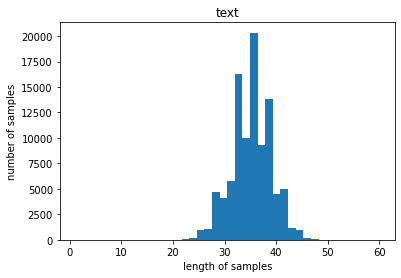

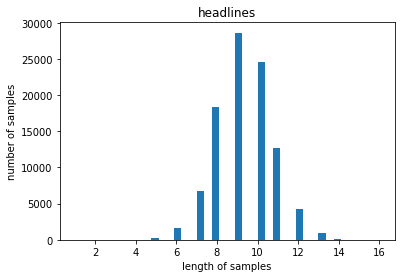

In [ ]:
showgraph(data['text'], data['headlines'])

[39, 45, 38, 34, 33, 34, 35, 35, 27, 34, 33, 42, 32, 38, 35, 39, 36, 32, 34, 36, 34, 40, 32, 36, 39, 35, 29, 34, 38, 39, 38, 36, 43, 42, 34, 40, 36, 35, 38, 31, 38, 40, 35, 38, 38, 32, 33, 35, 36, 36, 39, 35, 1, 24, 32, 36, 38, 34, 40, 40, 35, 43, 30, 38, 41, 41, 37, 34, 34, 44, 37, 40, 40, 34, 38, 36, 34, 34, 40, 35, 39, 37, 45, 37, 33, 35, 36, 38, 37, 36, 35, 32, 32, 31, 27, 28, 34, 33, 33, 36, 39, 42, 35, 40, 42, 36, 39, 33, 35, 33, 45, 34, 34, 36, 35, 37, 32, 36, 34, 36, 38, 38, 39, 35, 36, 31, 39, 44, 40, 41, 36, 33, 35, 36, 32, 33, 27, 43, 38, 37, 34, 33, 37, 31, 41, 34, 36, 35, 36, 31, 34, 35, 39, 41, 38, 41, 32, 38, 35, 32, 33, 36, 38, 39, 33, 34, 38, 34, 35, 37, 32, 38, 31, 33, 31, 37, 35, 39, 38, 25, 36, 35, 38, 33, 27, 39, 39, 31, 34, 37, 37, 37, 34, 37, 29, 35, 38, 41, 36, 34, 37, 34, 32, 34, 35, 36, 35, 39, 38, 32, 40, 35, 41, 34, 38, 35, 36, 40, 38, 34, 27, 33, 35, 35, 33, 37, 38, 38, 34, 38, 32, 41, 34, 36, 28, 31, 35, 36, 37, 32, 40, 33, 41, 33, 36, 38, 35, 37, 45, 36, 

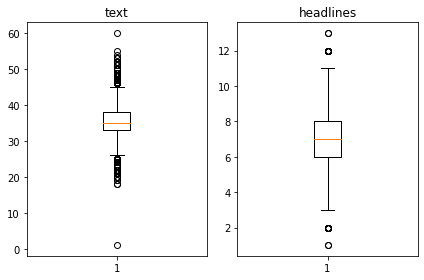

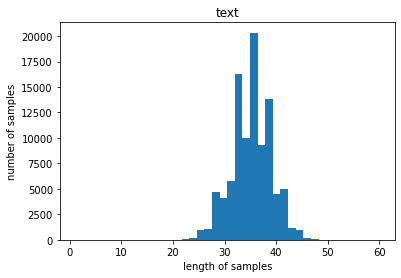

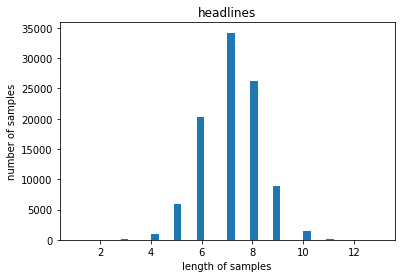

In [ ]:
showgraph(data2['text'], data2['headlines'])

##  위 함수를 통해 요약본(headlines)의 최대값, 평균, 표준편차가 살짝 다른 점을 발견할 수 있었다.

## 최대값 16/13 평균 9/7 

## 텍스트 최대 이상치 45~46 요약 최대 이상치 13/11

## 필자는 그래프, 값을 통해 2가지 데이터 다 사용하기로 했다.

# 앞에 표를 보고 이제 text, headlines 최대길이를 정해야 하는데...



In [ ]:
text_max_len = 45
text_max_len_1 = 46
text_min_len = 25
text_min_len_1 = 26
headlines_max_len = 13
headlines_min_len = 5

text_max_len2 = 45
text_max_len2_1 = 46
text_min_len2 = 25
text_min_len2_1 = 26
headlines_max_len2 = 11
headlines_min_len2 = 3

In [ ]:
def below_threshold_len(max_len, min_len ,nested_list, str):
    
  cnt = 0
  for s in nested_list:
    if((len(s.split()) <= max_len) and (len(s.split()) >= min_len)):
        cnt = cnt + 1
  print('전체 %s 중 길이가 %s 이상 %s 이하인 샘플의 비율: %s'%(str , min_len ,max_len, (cnt / len(nested_list))))

In [ ]:
below_threshold_len(text_max_len, text_min_len, data['text'], '텍스트')
below_threshold_len(text_max_len, text_min_len_1, data['text'], '텍스트')
below_threshold_len(text_max_len_1, text_min_len, data['text'], '텍스트')
below_threshold_len(text_max_len_1, text_min_len_1, data['text'], '텍스트')
below_threshold_len(headlines_max_len, headlines_min_len,  data['headlines'], '요약')
below_threshold_len(text_max_len2, text_min_len2, data2['text'], '텍스트')
below_threshold_len(text_max_len2, text_min_len2_1, data2['text'], '텍스트')
below_threshold_len(text_max_len2_1, text_min_len2, data2['text'], '텍스트')
below_threshold_len(text_max_len2_1, text_min_len2_1, data2['text'], '텍스트')
below_threshold_len(headlines_max_len2, headlines_min_len2,  data2['headlines'], '요약')

전체 텍스트 중 길이가 25 이상 45 이하인 샘플의 비율: 0.994408296055307
전체 텍스트 중 길이가 26 이상 45 이하인 샘플의 비율: 0.9910532736884913
전체 텍스트 중 길이가 25 이상 46 이하인 샘플의 비율: 0.9959333062220415
전체 텍스트 중 길이가 26 이상 46 이하인 샘플의 비율: 0.9925782838552257
전체 요약 중 길이가 5 이상 13 이하인 샘플의 비율: 0.9979971533143555
전체 텍스트 중 길이가 25 이상 45 이하인 샘플의 비율: 0.994408296055307
전체 텍스트 중 길이가 26 이상 45 이하인 샘플의 비율: 0.9910532736884913
전체 텍스트 중 길이가 25 이상 46 이하인 샘플의 비율: 0.9959333062220415
전체 텍스트 중 길이가 26 이상 46 이하인 샘플의 비율: 0.9925782838552257
전체 요약 중 길이가 3 이상 11 이하인 샘플의 비율: 0.9995221634810899


In [ ]:
below_threshold_len(38, 33, data['text'], '텍스트')
below_threshold_len(38, 33, data2['text'], '텍스트')
below_threshold_len(10, 8,  data['headlines'], '요약')
below_threshold_len(8, 6,  data2['headlines'], '요약')


전체 텍스트 중 길이가 33 이상 38 이하인 샘플의 비율: 0.5708519723464823
전체 텍스트 중 길이가 33 이상 38 이하인 샘플의 비율: 0.5708519723464823
전체 요약 중 길이가 8 이상 10 이하인 샘플의 비율: 0.7275823505490037
전체 요약 중 길이가 6 이상 8 이하인 샘플의 비율: 0.8208621390809272


In [ ]:
below_threshold_len(45, 25, data['text'], '텍스트')

전체 텍스트 중 길이가 25 이상 45 이하인 샘플의 비율: 0.994408296055307


In [ ]:
below_threshold_len(45, 1, data['text'], '텍스트')

전체 텍스트 중 길이가 1 이상 45 이하인 샘플의 비율: 0.9967771451809678


In [ ]:
below_threshold_len(60, 25, data['text'], '텍스트')

전체 텍스트 중 길이가 25 이상 60 이하인 샘플의 비율: 0.9976311508743392


In [ ]:
below_threshold_len(45, 38, data['text'], '텍스트')

전체 텍스트 중 길이가 38 이상 45 이하인 샘플의 비율: 0.2589467263115087


In [ ]:
below_threshold_len(33, 25, data['text'], '텍스트')

전체 텍스트 중 길이가 25 이상 33 이하인 샘플의 비율: 0.3330113867425783


In [ ]:
below_threshold_len(38, 25, data['text'], '텍스트')

전체 텍스트 중 길이가 25 이상 38 이하인 샘플의 비율: 0.8139690931272875


In [ ]:
below_threshold_len(45, 33, data['text'], '텍스트')

전체 텍스트 중 길이가 33 이상 45 이하인 샘플의 비율: 0.7512911752745018


# 데이터 범위를 정하는 기준을 더 정확하게 하기 위해 2개 함수를 추가하기로 했다.

In [ ]:
def below_threshold_len_2(max_len, min_len ,nested_list, str):
    
  cnt = 0
  for s in nested_list:
    if((len(s.split()) < max_len) and (len(s.split()) > min_len)):
        cnt = cnt + 1
  print('전체 %s 중 길이가 %s 초과 %s 미만인 샘플의 비율: %s'%(str , min_len ,max_len, (cnt / len(nested_list))))

In [ ]:
def below_threshold_len_same(length, nested_list, str):
    
  cnt = 0
  for s in nested_list:
    if(len(s.split()) == length):
        cnt = cnt + 1
  print('전체 %s 중 길이가 %s인 샘플의 비율: %s'%(str ,length ,(cnt / len(nested_list))))

In [ ]:
below_threshold_len_2(38, 33, data['text'], '텍스트')

전체 텍스트 중 길이가 33 초과 38 미만인 샘플의 비율: 0.40245018300122


In [ ]:
below_threshold_len_same(38, data['text'], '텍스트')

전체 텍스트 중 길이가 38인 샘플의 비율: 0.07850752338348922


In [ ]:
below_threshold_len_same(33, data['text'], '텍스트')

전체 텍스트 중 길이가 33인 샘플의 비율: 0.08989426596177308


In [ ]:
below_threshold_len_same(25, data['text'], '텍스트')
below_threshold_len_same(45, data['text'], '텍스트')

전체 텍스트 중 길이가 25인 샘플의 비율: 0.0033550223668157787
전체 텍스트 중 길이가 45인 샘플의 비율: 0.0034058560390402602


In [ ]:
below_threshold_len_2(33, 25, data['text'], '텍스트')

전체 텍스트 중 길이가 25 초과 33 미만인 샘플의 비율: 0.23976209841398943


In [ ]:
below_threshold_len(33, 25, data['text'], '텍스트')

전체 텍스트 중 길이가 25 이상 33 이하인 샘플의 비율: 0.3330113867425783


In [ ]:
below_threshold_len_same(25, data['text'], '텍스트')
below_threshold_len_same(33, data['text'], '텍스트')

전체 텍스트 중 길이가 25인 샘플의 비율: 0.0033550223668157787
전체 텍스트 중 길이가 33인 샘플의 비율: 0.08989426596177308


In [ ]:
for i in range(32):
  below_threshold_len_same(i, data['text'], '텍스트')

전체 텍스트 중 길이가 0인 샘플의 비율: 0.0
전체 텍스트 중 길이가 1인 샘플의 비율: 1.0166734444896299e-05
전체 텍스트 중 길이가 2인 샘플의 비율: 0.0
전체 텍스트 중 길이가 3인 샘플의 비율: 0.0
전체 텍스트 중 길이가 4인 샘플의 비율: 0.0
전체 텍스트 중 길이가 5인 샘플의 비율: 0.0
전체 텍스트 중 길이가 6인 샘플의 비율: 0.0
전체 텍스트 중 길이가 7인 샘플의 비율: 0.0
전체 텍스트 중 길이가 8인 샘플의 비율: 0.0
전체 텍스트 중 길이가 9인 샘플의 비율: 0.0
전체 텍스트 중 길이가 10인 샘플의 비율: 0.0
전체 텍스트 중 길이가 11인 샘플의 비율: 0.0
전체 텍스트 중 길이가 12인 샘플의 비율: 0.0
전체 텍스트 중 길이가 13인 샘플의 비율: 0.0
전체 텍스트 중 길이가 14인 샘플의 비율: 0.0
전체 텍스트 중 길이가 15인 샘플의 비율: 0.0
전체 텍스트 중 길이가 16인 샘플의 비율: 0.0
전체 텍스트 중 길이가 17인 샘플의 비율: 0.0
전체 텍스트 중 길이가 18인 샘플의 비율: 2.0333468889792597e-05
전체 텍스트 중 길이가 19인 샘플의 비율: 2.0333468889792597e-05
전체 텍스트 중 길이가 20인 샘플의 비율: 4.0666937779585194e-05
전체 텍스트 중 길이가 21인 샘플의 비율: 0.0001321675477836519
전체 텍스트 중 길이가 22인 샘플의 비율: 0.0001830012200081334
전체 텍스트 중 길이가 23인 샘플의 비율: 0.0005185034566897112
전체 텍스트 중 길이가 24인 샘플의 비율: 0.0014436762911752745
전체 텍스트 중 길이가 25인 샘플의 비율: 0.0033550223668157787
전체 텍스트 중 길이가 26인 샘플의 비율: 0.006364375762505084
전체 텍스트 중 길이가 27인 샘플의 비율: 0.01057340382269215

In [ ]:
below_threshold_len_same(32, data['text'], '텍스트')

전체 텍스트 중 길이가 32인 샘플의 비율: 0.07531516876779179


In [ ]:
for i in range(38,45):
  below_threshold_len_same(i, data['text'], '텍스트')

전체 텍스트 중 길이가 38인 샘플의 비율: 0.07850752338348922
전체 텍스트 중 길이가 39인 샘플의 비율: 0.06187474583163888
전체 텍스트 중 길이가 40인 샘플의 비율: 0.04565880439202928
전체 텍스트 중 길이가 41인 샘플의 비율: 0.031089873932492882
전체 텍스트 중 길이가 42인 샘플의 비율: 0.020069133794225296
전체 텍스트 중 길이가 43인 샘플의 비율: 0.012149247661651078
전체 텍스트 중 길이가 44인 샘플의 비율: 0.006191541276941846


In [ ]:
below_threshold_len(43, 27, data['text'], '텍스트')

전체 텍스트 중 길이가 27 이상 43 이하인 샘플의 비율: 0.975091500610004


# 텍스트 데이터 비율을 구하면서 여러가지 경우를 생각하고 데이터를 처리를 하기로 했다.

# 1. 1% 이상 값 이외에 제거하기

# 2. 이상치 값만 제거하기

# 이제 요약도 이와 같은 기준으로 비율을 구하겠습니다

# 1. 불용치 제거하지 않은 요약

In [ ]:
below_threshold_len(13 ,5 , data['headlines'], '요약')

전체 요약 중 길이가 5 이상 13 이하인 샘플의 비율: 0.9979971533143555


In [ ]:
below_threshold_len(10 ,8 , data['headlines'], '요약')

전체 요약 중 길이가 8 이상 10 이하인 샘플의 비율: 0.7275823505490037


In [ ]:
below_threshold_len(8 ,5 , data['headlines'], '요약')

전체 요약 중 길이가 5 이상 8 이하인 샘플의 비율: 0.27539650264335097


In [ ]:
below_threshold_len(13 ,10 , data['headlines'], '요약')

전체 요약 중 길이가 10 이상 13 이하인 샘플의 비율: 0.431567710451403


In [ ]:
below_threshold_len_same(10, data['headlines'], '요약')
below_threshold_len_same(8, data['headlines'], '요약')
below_threshold_len_same(13, data['headlines'], '요약')
below_threshold_len_same(5, data['headlines'], '요약')

전체 요약 중 길이가 10인 샘플의 비율: 0.24969499796665312
전체 요약 중 길이가 8인 샘플의 비율: 0.18685441236274908
전체 요약 중 길이가 13인 샘플의 비율: 0.01013623424156161
전체 요약 중 길이가 5인 샘플의 비율: 0.002287515250101667


In [ ]:
for i in range(1,17):
  below_threshold_len_same(i, data['headlines'], '요약')

전체 요약 중 길이가 1인 샘플의 비율: 1.0166734444896299e-05
전체 요약 중 길이가 2인 샘플의 비율: 0.0
전체 요약 중 길이가 3인 샘플의 비율: 2.0333468889792597e-05
전체 요약 중 길이가 4인 샘플의 비율: 0.00014233428222854819
전체 요약 중 길이가 5인 샘플의 비율: 0.002287515250101667
전체 요약 중 길이가 6인 샘플의 비율: 0.01720211468076454
전체 요약 중 길이가 7인 샘플의 비율: 0.06905246034973567
전체 요약 중 길이가 8인 샘플의 비율: 0.18685441236274908
전체 요약 중 길이가 9인 샘플의 비율: 0.29103294021960147
전체 요약 중 길이가 10인 샘플의 비율: 0.24969499796665312
전체 요약 중 길이가 11인 샘플의 비율: 0.12869052460349736
전체 요약 중 길이가 12인 샘플의 비율: 0.04304595363969093
전체 요약 중 길이가 13인 샘플의 비율: 0.01013623424156161
전체 요약 중 길이가 14인 샘플의 비율: 0.0016063440422936152
전체 요약 중 길이가 15인 샘플의 비율: 0.0001931679544530297
전체 요약 중 길이가 16인 샘플의 비율: 3.05002033346889e-05


In [ ]:
below_threshold_len(13 ,6 , data['headlines'], '요약')

전체 요약 중 길이가 6 이상 13 이하인 샘플의 비율: 0.9957096380642537


# 2. 불용치 처리한 요약문

In [ ]:
for i in range(1,14):
  below_threshold_len_same(i, data2['headlines'], '요약')

전체 요약 중 길이가 1인 샘플의 비율: 2.0333468889792597e-05
전체 요약 중 길이가 2인 샘플의 비율: 0.00020333468889792598
전체 요약 중 길이가 3인 샘플의 비율: 0.0016571777145180967
전체 요약 중 길이가 4인 샘플의 비율: 0.010146400976006506
전체 요약 중 길이가 5인 샘플의 비율: 0.059688897925986174
전체 요약 중 길이가 6인 샘플의 비율: 0.20700488003253356
전체 요약 중 길이가 7인 샘플의 비율: 0.347742984953233
전체 요약 중 길이가 8인 샘플의 비율: 0.26611427409516064
전체 요약 중 길이가 9인 샘플의 비율: 0.09004676697844652
전체 요약 중 길이가 10인 샘플의 비율: 0.015209434729564864
전체 요약 중 길이가 11인 샘플의 비율: 0.0019113460756405042
전체 요약 중 길이가 12인 샘플의 비율: 0.0002338348922326149
전체 요약 중 길이가 13인 샘플의 비율: 2.0333468889792597e-05


In [ ]:
below_threshold_len(10 ,4 , data2['headlines'], '요약')

전체 요약 중 길이가 4 이상 10 이하인 샘플의 비율: 0.9959536396909313


In [ ]:
data_t = data.copy()
data_t_1 = data.copy()
data_t2 = data2.copy()
data_t2_1 = data2.copy()

# 요약문 불용처리 X and 1% 미만값만 지웠을 때

In [ ]:
data_t = data_t[data_t['text'].apply(lambda x: len(x.split()) <= 43 and len(x.split()) >= 27 )]
data_t = data_t[data_t['headlines'].apply(lambda x: len(x.split()) <= 13 and len(x.split()) >= 6)]
print('전체 샘플수 :', (len(data)))
print('수정 후 샘플수 :', (len(data_t)))

전체 샘플수 : 98360
수정 후 샘플수 : 95499


# 요약문 불용처리 X and 이상치 값만 지웠을 때

In [ ]:
data_t_1 = data_t_1[data_t_1['text'].apply(lambda x: len(x.split()) <= 45 and len(x.split()) >= 25 )]
data_t_1 = data_t_1[data_t_1['headlines'].apply(lambda x: len(x.split()) <= 13 and len(x.split()) >= 5)]
print('전체 샘플수 :', (len(data)))
print('수정 후 샘플수 :', (len(data_t_1)))

전체 샘플수 : 98360
수정 후 샘플수 : 97614


# 요약문 불용처리 O and 1% 미만값만 지웠을 때

In [ ]:
data_t2 = data_t2[data_t2['text'].apply(lambda x: len(x.split()) <= 43 and len(x.split()) >= 27 )]
data_t2 = data_t2[data_t2['headlines'].apply(lambda x: len(x.split()) <= 10 and len(x.split()) >= 4)]
print('전체 샘플수 :', (len(data)))
print('수정 후 샘플수 :', (len(data_t2)))

전체 샘플수 : 98360
수정 후 샘플수 : 95563


# 요약문 불용처리 O and 이상치 값만 지웠을 때

In [ ]:
data_t2_1 = data_t2_1[data_t2_1['text'].apply(lambda x: len(x.split()) <= 45 and len(x.split()) >= 25 )]
data_t2_1 = data_t2_1[data_t2_1['headlines'].apply(lambda x: len(x.split()) <= 11 and len(x.split()) >= 3)]
print('전체 샘플수 :', (len(data)))
print('수정 후 샘플수 :', (len(data_t2_1)))

전체 샘플수 : 98360
수정 후 샘플수 : 97767


# 범위값 저장

In [ ]:
text_max_len_t = 43
headlines_max_len_t = 13

text_max_len_t_1 = 45
headlines_max_len_t_1 = 13

text_max_len_t2 = 43
headlines_max_len_t2 = 10

text_max_len_t2_1 = 45
headlines_max_len_t2_1 = 11

# 시작, 끝 토큰 추가

In [ ]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data_t['decoder_input'] = data_t['headlines'].apply(lambda x : 'sostoken '+ x)
data_t['decoder_target'] = data_t['headlines'].apply(lambda x : x + ' eostoken')
data_t.head()

headlines  \
0  upgrad learner switches to career in ml al wit...   
2  new zealand end rohit sharma led india match w...   
3  aegon life iterm insurance plan helps customer...   
4  have known hirani for yrs what if metoo claims...   
5  rahat fateh ali khan denies getting notice for...   

                                                text  \
0  saurav kant alumnus upgrad iiit pg program mac...   
2  new zealand defeated india wickets fourth odi ...   
3  aegon life iterm insurance plan customers enjo...   
4  speaking sexual harassment allegations rajkuma...   
5  pakistani singer rahat fateh ali khan denied r...   

                                       decoder_input  \
0  sostoken upgrad learner switches to career in ...   
2  sostoken new zealand end rohit sharma led indi...   
3  sostoken aegon life iterm insurance plan helps...   
4  sostoken have known hirani for yrs what if met...   
5  sostoken rahat fateh ali khan denies getting n...   

                                      decoder_target  
0  upgrad learner switches to career in ml al wit...  
2  new zealand end rohit sharma led india match w...  
3  aegon life iterm insurance plan helps customer...  
4  have known hirani for yrs what if metoo claims...  
5  rahat fateh ali khan denies getting notice for...

In [ ]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data_t_1['decoder_input'] = data_t_1['headlines'].apply(lambda x : 'sostoken '+ x)
data_t_1['decoder_target'] = data_t_1['headlines'].apply(lambda x : x + ' eostoken')
data_t_1.head()

headlines  \
0  upgrad learner switches to career in ml al wit...   
1  delhi techie wins free food from swiggy for on...   
2  new zealand end rohit sharma led india match w...   
3  aegon life iterm insurance plan helps customer...   
4  have known hirani for yrs what if metoo claims...   

                                                text  \
0  saurav kant alumnus upgrad iiit pg program mac...   
1  kunal shah credit card bill payment platform c...   
2  new zealand defeated india wickets fourth odi ...   
3  aegon life iterm insurance plan customers enjo...   
4  speaking sexual harassment allegations rajkuma...   

                                       decoder_input  \
0  sostoken upgrad learner switches to career in ...   
1  sostoken delhi techie wins free food from swig...   
2  sostoken new zealand end rohit sharma led indi...   
3  sostoken aegon life iterm insurance plan helps...   
4  sostoken have known hirani for yrs what if met...   

                                      decoder_target  
0  upgrad learner switches to career in ml al wit...  
1  delhi techie wins free food from swiggy for on...  
2  new zealand end rohit sharma led india match w...  
3  aegon life iterm insurance plan helps customer...  
4  have known hirani for yrs what if metoo claims...

In [ ]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data_t2['decoder_input'] = data_t2['headlines'].apply(lambda x : 'sostoken '+ x)
data_t2['decoder_target'] = data_t2['headlines'].apply(lambda x : x + ' eostoken')
data_t2.head()

headlines  \
0   upgrad learner switches career ml al salary hike   
2  new zealand end rohit sharma led india match w...   
3  aegon life iterm insurance plan helps customer...   
4           known hirani yrs metoo claims true sonam   
5  rahat fateh ali khan denies getting notice smu...   

                                                text  \
0  saurav kant alumnus upgrad iiit pg program mac...   
2  new zealand defeated india wickets fourth odi ...   
3  aegon life iterm insurance plan customers enjo...   
4  speaking sexual harassment allegations rajkuma...   
5  pakistani singer rahat fateh ali khan denied r...   

                                       decoder_input  \
0  sostoken upgrad learner switches career ml al ...   
2  sostoken new zealand end rohit sharma led indi...   
3  sostoken aegon life iterm insurance plan helps...   
4  sostoken known hirani yrs metoo claims true sonam   
5  sostoken rahat fateh ali khan denies getting n...   

                                      decoder_target  
0  upgrad learner switches career ml al salary hi...  
2  new zealand end rohit sharma led india match w...  
3  aegon life iterm insurance plan helps customer...  
4  known hirani yrs metoo claims true sonam eostoken  
5  rahat fateh ali khan denies getting notice smu...

In [ ]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data_t2_1['decoder_input'] = data_t2_1['headlines'].apply(lambda x : 'sostoken '+ x)
data_t2_1['decoder_target'] = data_t2_1['headlines'].apply(lambda x : x + ' eostoken')
data_t2_1.head()

headlines  \
0   upgrad learner switches career ml al salary hike   
1   delhi techie wins free food swiggy one year cred   
2  new zealand end rohit sharma led india match w...   
3  aegon life iterm insurance plan helps customer...   
4           known hirani yrs metoo claims true sonam   

                                                text  \
0  saurav kant alumnus upgrad iiit pg program mac...   
1  kunal shah credit card bill payment platform c...   
2  new zealand defeated india wickets fourth odi ...   
3  aegon life iterm insurance plan customers enjo...   
4  speaking sexual harassment allegations rajkuma...   

                                       decoder_input  \
0  sostoken upgrad learner switches career ml al ...   
1  sostoken delhi techie wins free food swiggy on...   
2  sostoken new zealand end rohit sharma led indi...   
3  sostoken aegon life iterm insurance plan helps...   
4  sostoken known hirani yrs metoo claims true sonam   

                                      decoder_target  
0  upgrad learner switches career ml al salary hi...  
1  delhi techie wins free food swiggy one year cr...  
2  new zealand end rohit sharma led india match w...  
3  aegon life iterm insurance plan helps customer...  
4  known hirani yrs metoo claims true sonam eostoken

# 넘파이 변환

In [ ]:
encoder_input_t = np.array(data_t['text']) # 인코더의 입력
decoder_input_t = np.array(data_t['decoder_input']) # 디코더의 입력
decoder_target_t = np.array(data_t['decoder_target']) # 디코더의 레이블

encoder_input_t_1 = np.array(data_t_1['text']) # 인코더의 입력
decoder_input_t_1 = np.array(data_t_1['decoder_input']) # 디코더의 입력
decoder_target_t_1 = np.array(data_t_1['decoder_target']) # 디코더의 레이블

encoder_input_t2 = np.array(data_t2['text']) # 인코더의 입력
decoder_input_t2 = np.array(data_t2['decoder_input']) # 디코더의 입력
decoder_target_t2 = np.array(data_t2['decoder_target']) # 디코더의 레이블

encoder_input_t2_1 = np.array(data_t2_1['text']) # 인코더의 입력
decoder_input_t2_1 = np.array(data_t2_1['decoder_input']) # 디코더의 입력
decoder_target_t2_1 = np.array(data_t2_1['decoder_target']) # 디코더의 레이블

# 섞어 섞어

In [ ]:
indices_t = np.arange(encoder_input_t.shape[0])
np.random.shuffle(indices_t)
print(indices_t)

indices_t_1 = np.arange(encoder_input_t_1.shape[0])
np.random.shuffle(indices_t_1)
print(indices_t_1)

indices_t2 = np.arange(encoder_input_t2.shape[0])
np.random.shuffle(indices_t2)
print(indices_t2)

indices_t2_1 = np.arange(encoder_input_t2_1.shape[0])
np.random.shuffle(indices_t2_1)
print(indices_t2_1)

[ 3736 28412 94258 ... 73913 58706 67666]
[74799 75148 69397 ... 25676 68398 28910]
[21271 77733 70775 ...  7144 49685 64324]
[ 6827  6370 86441 ... 63625 37486 75630]


In [ ]:
encoder_input_t = encoder_input_t[indices_t]
decoder_input_t = decoder_input_t[indices_t]
decoder_target_t = decoder_target_t[indices_t]

encoder_input_t_1 = encoder_input_t_1[indices_t_1]
decoder_input_t_1 = decoder_input_t_1[indices_t_1]
decoder_target_t_1 = decoder_target_t_1[indices_t_1]

encoder_input_t2 = encoder_input_t2[indices_t2]
decoder_input_t2 = decoder_input_t2[indices_t2]
decoder_target_t2 = decoder_target_t2[indices_t2]

encoder_input_t2_1 = encoder_input_t2_1[indices_t2_1]
decoder_input_t2_1 = decoder_input_t2_1[indices_t2_1]
decoder_target_t2_1 = decoder_target_t2_1[indices_t2_1]

# 테스트 데이터 수 정하기

In [ ]:
n_of_val_t = int(len(encoder_input_t)*0.2)
print('테스트 데이터의 수 :', n_of_val_t)

n_of_val_t_1 = int(len(encoder_input_t_1)*0.2)
print('테스트 데이터의 수 :', n_of_val_t_1)

n_of_val_t2 = int(len(encoder_input_t2)*0.2)
print('테스트 데이터의 수 :', n_of_val_t2)

n_of_val_t2_1 = int(len(encoder_input_t2_1)*0.2)
print('테스트 데이터의 수 :', n_of_val_t2_1)

테스트 데이터의 수 : 19099
테스트 데이터의 수 : 19522
테스트 데이터의 수 : 19112
테스트 데이터의 수 : 19553


In [ ]:
encoder_input_train_t, encoder_input_train_t_1, encoder_input_train_t2, encoder_input_train_t2_1 = np.array([]), np.array([]), np.array([]), np.array([])
decoder_input_train_t, decoder_input_train_t_1, decoder_input_train_t2, decoder_input_train_t2_1 = np.array([]), np.array([]), np.array([]), np.array([])
decoder_target_train_t, decoder_target_train_t_1, decoder_target_train_t2, decoder_target_train_t2_1 = np.array([]), np.array([]), np.array([]), np.array([])

In [ ]:
encoder_input_test_t, encoder_input_test_t_1, encoder_input_test_t2, encoder_input_test_t2_1 = np.array([]), np.array([]), np.array([]), np.array([])
decoder_input_test_t, decoder_input_test_t_1, decoder_input_test_t2, decoder_input_test_t2_1 = np.array([]), np.array([]), np.array([]), np.array([])
decoder_target_test_t, decoder_target_test_t_1, decoder_target_test_t2, decoder_target_test_t2_1 = np.array([]), np.array([]), np.array([]), np.array([])

In [ ]:
def train_test(encoder_input_train, decoder_input_train, decoder_target_train, encoder_input_test, decoder_input_test, decoder_target_test, encoder_input, decoder_input, decoder_target, n_of_val ):
  encoder_input_train = encoder_input[:-n_of_val]
  decoder_input_train = decoder_input[:-n_of_val]
  decoder_target_train = decoder_target[:-n_of_val]

  encoder_input_test = encoder_input[-n_of_val:]
  decoder_input_test = decoder_input[-n_of_val:]
  decoder_target_test = decoder_target[-n_of_val:]

  print('훈련 데이터의 개수 :', len(encoder_input_train))
  print('훈련 레이블의 개수 :', len(decoder_input_train))
  print('테스트 데이터의 개수 :', len(encoder_input_test))
  print('테스트 레이블의 개수 :', len(decoder_input_test))

  return encoder_input_train, decoder_input_train, decoder_target_train, encoder_input_test, decoder_input_test, decoder_target_test, encoder_input, decoder_input, decoder_target

In [ ]:
encoder_input_train_t, decoder_input_train_t, decoder_target_train_t, encoder_input_test_t, decoder_input_test_t, decoder_target_test_t, encoder_input_t, decoder_input_t, decoder_target_t = train_test(encoder_input_train_t, decoder_input_train_t, decoder_target_train_t, encoder_input_test_t, decoder_input_test_t, decoder_target_test_t, encoder_input_t, decoder_input_t, decoder_target_t, n_of_val_t)

훈련 데이터의 개수 : 76400
훈련 레이블의 개수 : 76400
테스트 데이터의 개수 : 19099
테스트 레이블의 개수 : 19099


In [ ]:
encoder_input_train_t_1, decoder_input_train_t_1, decoder_target_train_t_1, encoder_input_test_t_1, decoder_input_test_t_1, decoder_target_test_t_1, encoder_input_t_1, decoder_input_t_1, decoder_target_t_1 = train_test(encoder_input_train_t_1, decoder_input_train_t_1, decoder_target_train_t_1, encoder_input_test_t_1, decoder_input_test_t_1, decoder_target_test_t_1, encoder_input_t_1, decoder_input_t_1, decoder_target_t_1, n_of_val_t_1)

훈련 데이터의 개수 : 78092
훈련 레이블의 개수 : 78092
테스트 데이터의 개수 : 19522
테스트 레이블의 개수 : 19522


In [ ]:
encoder_input_train_t2, decoder_input_train_t2, decoder_target_train_t2, encoder_input_test_t2, decoder_input_test_t2, decoder_target_test_t2, encoder_input_t2, decoder_input_t2, decoder_target_t2 = train_test(encoder_input_train_t2, decoder_input_train_t2, decoder_target_train_t2, encoder_input_test_t2, decoder_input_test_t2, decoder_target_test_t2, encoder_input_t2, decoder_input_t2, decoder_target_t2, n_of_val_t2)

훈련 데이터의 개수 : 76451
훈련 레이블의 개수 : 76451
테스트 데이터의 개수 : 19112
테스트 레이블의 개수 : 19112


In [ ]:
encoder_input_train_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, encoder_input_test_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1, encoder_input_t2_1, decoder_input_t2_1, decoder_target_t2_1 = train_test(encoder_input_train_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, encoder_input_test_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1, encoder_input_t2_1, decoder_input_t2_1, decoder_target_t2_1, n_of_val_t2_1)

훈련 데이터의 개수 : 78214
훈련 레이블의 개수 : 78214
테스트 데이터의 개수 : 19553
테스트 레이블의 개수 : 19553


In [ ]:
decoder_target_t[0]

'yr old gang raped in moving auto left unconscious in gurugram eostoken'

# 토크나이저~~

In [ ]:
src_tokenizer_t = Tokenizer() # 토크나이저 정의
src_tokenizer_t.fit_on_texts(encoder_input_train_t) # 입력된 데이터로부터 단어 집합 생성

In [ ]:
len(src_tokenizer_t.word_index)

0

In [ ]:
src_tokenizer_t_1 = Tokenizer() # 토크나이저 정의
src_tokenizer_t_1.fit_on_texts(encoder_input_train_t_1) # 입력된 데이터로부터 단어 집합 생성

In [ ]:
src_tokenizer_t2 = Tokenizer() # 토크나이저 정의
src_tokenizer_t2.fit_on_texts(encoder_input_train_t2) # 입력된 데이터로부터 단어 집합 생성

In [ ]:
src_tokenizer_t2_1 = Tokenizer() # 토크나이저 정의
src_tokenizer_t2_1.fit_on_texts(encoder_input_train_t2_1) # 입력된 데이터로부터 단어 집합 생성

In [ ]:
src_tokenizer_t.word_counts.items()

odict_items([('actor', 3749), ('kunal', 101), ('kemmu', 20), ('confirmed', 743), ('pregnancy', 178), ('wife', 1879), ('soha', 47), ('ali', 801), ('khan', 3108), ('happy', 672), ('announce', 121), ('joint', 501), ('production', 501), ('coming', 471), ('later', 1897), ('year', 14003), ('first', 8988), ('child', 1093), ('feel', 606), ('blessed', 69), ('thank', 283), ('good', 1219), ('wishes', 158), ('said', 41771), ('couple', 914), ('completed', 469), ('two', 7998), ('years', 5858), ('marriage', 619), ('january', 999), ('calling', 904), ('south', 2093), ('korea', 1449), ('ignorant', 18), ('incompetent', 15), ('north', 1849), ('thursday', 3320), ('would', 5831), ('talks', 614), ('nations', 665), ('unless', 117), ('demands', 195), ('met', 754), ('recently', 1740), ('cancelled', 368), ('protest', 766), ('us', 11431), ('military', 1014), ('drills', 68), ('follows', 161), ('improvement', 48), ('inter', 138), ('korean', 828), ('relations', 302), ('historic', 109), ('summit', 400), ('koreas', 13

In [ ]:
encoder_input_train_t

array(['actor kunal kemmu confirmed pregnancy wife soha ali khan soha happy announce joint production coming later year first child feel blessed thank good wishes said kunal couple completed two years marriage january year',
       'calling south korea ignorant incompetent north korea thursday said would talks two nations unless demands met north korea recently cancelled talks south protest us south korea military drills follows improvement inter korean relations historic summit two koreas last month',
       'turkish government extended state emergency country three months starting wednesday third extension since failed coup attempt group within military july aimed combating terror threats fethullah terrorist organisation accused staging coup attempt deputy prime minister numan kurtulmus said',
       ...,
       'two indian nationals drowned one still missing jumped water save drowning children reportedly family members moonee beach australia children saved rescue team taken hospital

# 단어 등장 횟수 세보기

In [ ]:
def count_word(src_tokenizer,threshold):
  total_cnt = len(src_tokenizer.word_index) # 단어의 수
  rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
  total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
  rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

  # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
  for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

  print('단어 집합(vocabulary)의 크기 :', total_cnt)
  print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
  print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
  print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
  print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

# 4번이하

In [ ]:
count_word(src_tokenizer_t, 5)

단어 집합(vocabulary)의 크기 : 68600
등장 빈도가 4번 이하인 희귀 단어의 수: 42561
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 26039
단어 집합에서 희귀 단어의 비율: 62.04227405247813
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.6873592195354803


In [ ]:
count_word(src_tokenizer_t_1, 5)

단어 집합(vocabulary)의 크기 : 69217
등장 빈도가 4번 이하인 희귀 단어의 수: 42943
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 26274
단어 집합에서 희귀 단어의 비율: 62.04111706661658
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.666538211561908


In [ ]:
count_word(src_tokenizer_t2, 5)

단어 집합(vocabulary)의 크기 : 68581
등장 빈도가 4번 이하인 희귀 단어의 수: 42611
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 25970
단어 집합에서 희귀 단어의 비율: 62.132369023490476
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.698875074184861


In [ ]:
count_word(src_tokenizer_t2_1, 5)

단어 집합(vocabulary)의 크기 : 69159
등장 빈도가 4번 이하인 희귀 단어의 수: 42897
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 26262
단어 집합에서 희귀 단어의 비율: 62.02663427753438
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.6663994607298362


# 10번 이하

In [ ]:
count_word(src_tokenizer_t, 11)
print()
count_word(src_tokenizer_t_1, 11)
print()
count_word(src_tokenizer_t2, 11)
print()
count_word(src_tokenizer_t2_1, 11)

단어 집합(vocabulary)의 크기 : 68574
등장 빈도가 10번 이하인 희귀 단어의 수: 51315
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 17259
단어 집합에서 희귀 단어의 비율: 74.8315688161694
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.955420127121726

단어 집합(vocabulary)의 크기 : 69365
등장 빈도가 10번 이하인 희귀 단어의 수: 51993
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 17372
단어 집합에서 희귀 단어의 비율: 74.9556692856628
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.936526206615172

단어 집합(vocabulary)의 크기 : 68440
등장 빈도가 10번 이하인 희귀 단어의 수: 51217
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 17223
단어 집합에서 희귀 단어의 비율: 74.83489187609585
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.9542131164529355

단어 집합(vocabulary)의 크기 : 69362
등장 빈도가 10번 이하인 희귀 단어의 수: 51911
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 17451
단어 집합에서 희귀 단어의 비율: 74.84069086819872
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.894352482427909


# 20번 이하

In [ ]:
count_word(src_tokenizer_t, 21)
print()
count_word(src_tokenizer_t_1, 21)
print()
count_word(src_tokenizer_t2, 21)
print()
count_word(src_tokenizer_t2_1, 21)

단어 집합(vocabulary)의 크기 : 68574
등장 빈도가 20번 이하인 희귀 단어의 수: 56559
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 12015
단어 집합에서 희귀 단어의 비율: 82.47878204567328
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.841373448692401

단어 집합(vocabulary)의 크기 : 69365
등장 빈도가 20번 이하인 희귀 단어의 수: 57186
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 12179
단어 집합에서 희귀 단어의 비율: 82.44215382397464
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.7394016318600265

단어 집합(vocabulary)의 크기 : 68440
등장 빈도가 20번 이하인 희귀 단어의 수: 56439
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 12001
단어 집합에서 희귀 단어의 비율: 82.46493278784337
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.8340936523119336

단어 집합(vocabulary)의 크기 : 69362
등장 빈도가 20번 이하인 희귀 단어의 수: 57184
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 12178
단어 집합에서 희귀 단어의 비율: 82.44283613505954
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.728477262765384


 # 30번 이하

In [ ]:
count_word(src_tokenizer_t, 31)
print()
count_word(src_tokenizer_t_1, 31)
print()
count_word(src_tokenizer_t2, 31)
print()
count_word(src_tokenizer_t2_1, 31)

단어 집합(vocabulary)의 크기 : 68574
등장 빈도가 30번 이하인 희귀 단어의 수: 59085
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9489
단어 집합에서 희귀 단어의 비율: 86.16239391022836
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.192450343425573

단어 집합(vocabulary)의 크기 : 69365
등장 빈도가 30번 이하인 희귀 단어의 수: 59758
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9607
단어 집합에서 희귀 단어의 비율: 86.15007568658545
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.082052824151354

단어 집합(vocabulary)의 크기 : 68440
등장 빈도가 30번 이하인 희귀 단어의 수: 58926
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9514
단어 집합에서 희귀 단어의 비율: 86.09877264757452
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.145393764216374

단어 집합(vocabulary)의 크기 : 69362
등장 빈도가 30번 이하인 희귀 단어의 수: 59710
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9652
단어 집합에서 희귀 단어의 비율: 86.08459963668868
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.027141051487112


# 15번 이하

In [ ]:
count_word(src_tokenizer_t, 16)
print()
count_word(src_tokenizer_t_1, 16)
print()
count_word(src_tokenizer_t2, 16)
print()
count_word(src_tokenizer_t2_1, 16)

단어 집합(vocabulary)의 크기 : 68316
등장 빈도가 15번 이하인 희귀 단어의 수: 54295
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 14021
단어 집합에서 희귀 단어의 비율: 79.47625739211898
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.49119423634951

단어 집합(vocabulary)의 크기 : 69192
등장 빈도가 15번 이하인 희귀 단어의 수: 55002
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 14190
단어 집합에서 희귀 단어의 비율: 79.49184876864376
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.416617106746594

단어 집합(vocabulary)의 크기 : 68435
등장 빈도가 15번 이하인 희귀 단어의 수: 54405
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 14030
단어 집합에서 희귀 단어의 비율: 79.49879447651055
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.4727765408034985

단어 집합(vocabulary)의 크기 : 69201
등장 빈도가 15번 이하인 희귀 단어의 수: 54990
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 14211
단어 집합에서 희귀 단어의 비율: 79.46416959292496
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.397349946205394


In [ ]:
src_tokenizer_t.word_counts.values()

odict_values([187, 313, 2297, 201, 355, 516, 6293, 1700, 370, 346, 506, 1065, 2934, 14048, 8027, 70, 2693, 963, 657, 525, 42, 37, 2868, 139, 5258, 7991, 674, 661, 77, 8991, 2690, 412, 3566, 3776, 55, 647, 391, 519, 76, 178, 381, 4, 1573, 8804, 41822, 2004, 1553, 737, 3417, 711, 1686, 3799, 65, 1268, 569, 1163, 643, 1028, 1925, 365, 612, 99, 255, 76, 11361, 7117, 2309, 4153, 82, 79, 3277, 1609, 1357, 201, 2532, 46, 483, 25, 30, 82, 2840, 132, 3612, 340, 2632, 54, 64, 162, 28, 555, 1983, 1321, 219, 2500, 3, 298, 360, 1751, 520, 408, 491, 1035, 82, 679, 455, 1361, 65, 219, 3646, 2970, 2396, 174, 294, 2042, 598, 3, 4, 154, 148, 53, 2447, 680, 82, 42, 692, 143, 4495, 353, 1295, 1342, 2, 457, 4, 20, 159, 1332, 31, 1723, 17, 273, 136, 458, 450, 1057, 566, 52, 3668, 73, 250, 4593, 616, 56, 102, 93, 200, 8912, 868, 121, 71, 4028, 618, 178, 103, 98, 366, 3075, 1631, 1612, 353, 1, 459, 887, 116, 8041, 1405, 5, 870, 1336, 692, 261, 4495, 90, 67, 227, 28, 8478, 720, 219, 148, 617, 3637, 3114, 135, 

In [ ]:
len(src_tokenizer_t.word_counts.values())

68585

In [ ]:
t_value = src_tokenizer_t.word_counts.copy()

In [ ]:
t_value.values()

odict_values([187, 313, 2297, 201, 355, 516, 6293, 1700, 370, 346, 506, 1065, 2934, 14048, 8027, 70, 2693, 963, 657, 525, 42, 37, 2868, 139, 5258, 7991, 674, 661, 77, 8991, 2690, 412, 3566, 3776, 55, 647, 391, 519, 76, 178, 381, 4, 1573, 8804, 41822, 2004, 1553, 737, 3417, 711, 1686, 3799, 65, 1268, 569, 1163, 643, 1028, 1925, 365, 612, 99, 255, 76, 11361, 7117, 2309, 4153, 82, 79, 3277, 1609, 1357, 201, 2532, 46, 483, 25, 30, 82, 2840, 132, 3612, 340, 2632, 54, 64, 162, 28, 555, 1983, 1321, 219, 2500, 3, 298, 360, 1751, 520, 408, 491, 1035, 82, 679, 455, 1361, 65, 219, 3646, 2970, 2396, 174, 294, 2042, 598, 3, 4, 154, 148, 53, 2447, 680, 82, 42, 692, 143, 4495, 353, 1295, 1342, 2, 457, 4, 20, 159, 1332, 31, 1723, 17, 273, 136, 458, 450, 1057, 566, 52, 3668, 73, 250, 4593, 616, 56, 102, 93, 200, 8912, 868, 121, 71, 4028, 618, 178, 103, 98, 366, 3075, 1631, 1612, 353, 1, 459, 887, 116, 8041, 1405, 5, 870, 1336, 692, 261, 4495, 90, 67, 227, 28, 8478, 720, 219, 148, 617, 3637, 3114, 135, 

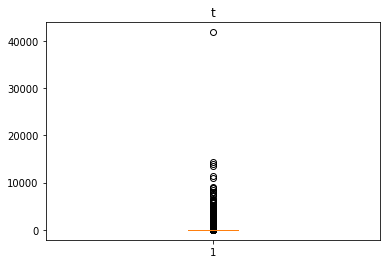

In [ ]:
plt.boxplot(t_value.values())
plt.title('t')
plt.show()

In [ ]:
type(t_value.values())


odict_values

In [ ]:
t_value

OrderedDict([('lionel', 187),
             ('messi', 313),
             ('led', 2297),
             ('argentina', 201),
             ('crashed', 355),
             ('fifa', 516),
             ('world', 6293),
             ('cup', 1700),
             ('suffering', 370),
             ('defeat', 346),
             ('france', 506),
             ('round', 1065),
             ('saturday', 2934),
             ('year', 14048),
             ('old', 8027),
             ('argentine', 70),
             ('captain', 2693),
             ('failed', 963),
             ('score', 657),
             ('goal', 525),
             ('wc', 42),
             ('knockout', 37),
             ('match', 2868),
             ('eighth', 139),
             ('time', 5258),
             ('two', 7991),
             ('champions', 674),
             ('reach', 661),
             ('quarters', 77),
             ('first', 8991),
             ('since', 2690),
             ('edition', 412),
             ('woman', 3566),
           

In [ ]:
def word2(src_vocab, src_tokenizer, encoder_input_train, encoder_input_test):
  src_tokenizer = Tokenizer(num_words=src_vocab)
  src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

  # 텍스트 시퀀스를 정수 시퀀스로 변환
  encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
  encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

  # 잘 진행되었는지 샘플 출력
  print(encoder_input_train[:3])
  return src_tokenizer ,encoder_input_train, encoder_input_test

# 4번 이하

In [ ]:
src_tokenizer_t, encoder_input_train_t, encoder_input_test_t = word2(42000, src_tokenizer_t, encoder_input_train_t, encoder_input_test_t)

[[2018, 2012, 25, 90, 13597, 21877, 4753, 87, 276, 16, 1105, 3367, 4184, 875, 539, 121, 1061, 18110, 2271, 103, 1892, 371, 11345, 2049, 12016, 71, 111, 360, 1196, 6667, 2291, 3368, 106, 14595, 7744, 1548], [276, 11063, 210, 9485, 9876, 588, 1124, 2307, 4100, 34412, 11346, 1332, 2708, 23640, 16451, 3977, 22, 299, 21878, 4101, 1497, 1757, 293, 19152, 668, 1020, 9485, 1691, 190, 1, 4317, 1307], [53, 6281, 8546, 210, 1652, 1972, 68, 886, 3695, 128, 1367, 1, 2071, 3636, 11064, 23641, 3186, 21879, 157, 1017, 852, 6281, 353, 1981, 1904, 9302, 2488, 15792, 14, 3388, 2964, 12380, 1581, 10781]]


In [ ]:
src_tokenizer_t_1, encoder_input_train_t_1, encoder_input_test_t_1 = word2(43000, src_tokenizer_t_1, encoder_input_train_t_1, encoder_input_test_t_1)
src_tokenizer_t2, encoder_input_train_t2, encoder_input_test_t2 = word2(42000, src_tokenizer_t2, encoder_input_train_t2, encoder_input_test_t2)
src_tokenizer_t2_1, encoder_input_train_t2_1, encoder_input_test_t2_1 = word2(43000, src_tokenizer_t2_1, encoder_input_train_t2_1, encoder_input_test_t2_1)

[[2030, 1937, 184, 1269, 4944, 2167, 4608, 198, 2563, 1465, 1851, 1446, 1528, 26275, 23, 10210, 8023, 2819, 5629, 2086, 747, 20611, 3689, 3915, 2886, 750, 29, 133, 355, 149, 14, 14244, 12521, 1, 1851, 17, 4271, 709, 1151], [778, 1167, 4805, 1389, 1131, 403, 463, 369, 1977, 2512, 10, 36, 748, 5919, 73, 154, 19, 68, 4272, 1018, 655, 233, 165, 1048, 7761, 1076, 3772, 19, 1, 463, 369, 13761], [1823, 1068, 1098, 336, 1293, 1756, 1082, 721, 426, 61, 425, 649, 721, 19338, 1293, 5313, 247, 1332, 930, 161, 1068, 358, 390, 478, 1144, 596, 478, 104, 16, 4139, 2747, 10894, 89, 3, 714, 478]]
[[2713, 2079, 1573, 719, 84, 3922, 7032, 1, 24, 2148, 5268, 3530, 338, 868, 4, 264, 215, 23, 287, 10, 633, 2095, 21821, 33, 3922, 102, 1223, 2991, 975, 719, 170, 15067, 2596, 7111, 5315, 1107], [76, 1243, 20, 92, 17230, 12382, 173, 10, 125, 9676, 675, 20, 767, 3058, 1118, 404, 12383, 139, 783, 260, 7610, 2970, 380, 10, 125, 9676, 675, 535, 8957, 1243, 20, 2665, 17230, 12382, 173, 10, 125, 9676, 675], [457, 119,

# 10번 이하

In [ ]:
src_tokenizer_t, encoder_input_train_t, encoder_input_test_t = word2(51300, src_tokenizer_t, encoder_input_train_t, encoder_input_test_t)
src_tokenizer_t_1, encoder_input_train_t_1, encoder_input_test_t_1 = word2(51900, src_tokenizer_t_1, encoder_input_train_t_1, encoder_input_test_t_1)
src_tokenizer_t2, encoder_input_train_t2, encoder_input_test_t2 = word2(51200, src_tokenizer_t2, encoder_input_train_t2, encoder_input_test_t2)
src_tokenizer_t2_1, encoder_input_train_t2_1, encoder_input_test_t2_1 = word2(51900, src_tokenizer_t2_1, encoder_input_train_t2_1, encoder_input_test_t2_1)

[[53, 4255, 12016, 622, 2705, 159, 7206, 575, 75, 7206, 699, 3679, 1010, 1011, 1084, 155, 3, 7, 384, 798, 5585, 1801, 331, 2991, 1, 4255, 489, 1092, 12, 23, 776, 429, 3], [496, 137, 249, 12756, 14042, 167, 249, 69, 1, 24, 783, 12, 715, 3778, 2499, 611, 167, 249, 188, 1380, 783, 137, 600, 5, 137, 249, 422, 5653, 2936, 7098, 3350, 557, 1682, 3988, 1271, 12, 15106, 29, 132], [2536, 9, 1566, 21, 901, 39, 31, 183, 1443, 57, 191, 3526, 100, 435, 6295, 1013, 96, 307, 422, 494, 881, 13593, 784, 1735, 18172, 1068, 722, 44, 8663, 6295, 1013, 843, 153, 14, 44090, 44091, 1]]
[[132, 30, 51, 2251, 578, 3553, 1453, 1165, 13, 840, 822, 4572, 9608, 78, 1058, 619, 2251, 116, 1, 2244, 1165, 1717, 3718, 144, 19353, 3210, 1058, 619, 43, 7532, 20583, 7983, 1165], [617, 2730, 3761, 6601, 80, 1199, 14238, 32, 9421, 34797, 14239, 592, 2881, 537, 3761, 139, 82, 4198, 11506, 16602, 4199, 5678, 4168, 3330, 592, 2881, 213, 2504, 29662, 225, 5626, 592, 2881, 11506, 44616, 9257, 1429, 264, 90, 1229, 52, 22], [36, 16

# 20번 이하

In [ ]:
src_tokenizer_t, encoder_input_train_t, encoder_input_test_t = word2(56500, src_tokenizer_t, encoder_input_train_t, encoder_input_test_t)
src_tokenizer_t_1, encoder_input_train_t_1, encoder_input_test_t_1 = word2(57100, src_tokenizer_t_1, encoder_input_train_t_1, encoder_input_test_t_1)
src_tokenizer_t2, encoder_input_train_t2, encoder_input_test_t2 = word2(56400, src_tokenizer_t2, encoder_input_train_t2, encoder_input_test_t2)
src_tokenizer_t2_1, encoder_input_train_t2_1, encoder_input_test_t2_1 = word2(57100, src_tokenizer_t2_1, encoder_input_train_t2_1, encoder_input_test_t2_1)

[[25, 20319, 1437, 7523, 366, 10275, 7647, 5545, 17213, 1633, 17, 1179, 462, 3306, 54, 4340, 2223, 387, 526, 795, 435, 232, 1389, 3980, 522, 1185, 1624, 2223, 41, 298, 10, 246, 67, 286, 8101], [5, 295, 1005, 11, 5320, 617, 50, 7648, 11, 2232, 889, 17, 11, 19165, 3432, 2095, 66, 8827, 233, 3, 13, 1035, 190, 1374, 719, 2676, 16411, 243, 819, 24, 1137], [558, 16, 3375, 1341, 844, 28, 558, 16, 6926, 5410, 1544, 1159, 3755, 431, 4511, 10, 140, 4405, 13150, 797, 1095, 19, 4405, 1600, 2791, 2, 116, 106, 1, 5410, 1, 23583, 2638, 13151, 188, 1159]]
[[84, 2480, 4079, 1501, 25, 3, 3475, 160, 341, 142, 172, 9, 1, 678, 821, 818, 40, 35, 263, 8, 492, 6520, 160, 95, 850, 2490, 3457, 97, 263, 15939, 15293, 7635, 19328], [359, 2949, 127, 471, 59, 1011, 357, 1512, 219, 66, 63, 2268, 133, 122, 323, 637, 753, 1512, 1011, 11, 79, 1505, 1582, 801, 36, 6035, 18253, 4570, 791, 4694, 122, 4132, 4695], [13317, 9445, 19329, 1683, 19, 621, 8525, 19, 4431, 1, 20601, 1015, 319, 44544, 764, 57, 20601, 8839, 1192, 14

# 30번 이하

In [ ]:
src_tokenizer_t, encoder_input_train_t, encoder_input_test_t = word2(59000, src_tokenizer_t, encoder_input_train_t, encoder_input_test_t)
src_tokenizer_t_1, encoder_input_train_t_1, encoder_input_test_t_1 = word2(59700, src_tokenizer_t_1, encoder_input_train_t_1, encoder_input_test_t_1)
src_tokenizer_t2, encoder_input_train_t2, encoder_input_test_t2 = word2(58900, src_tokenizer_t2, encoder_input_train_t2, encoder_input_test_t2)
src_tokenizer_t2_1, encoder_input_train_t2_1, encoder_input_test_t2_1 = word2(59700, src_tokenizer_t2_1, encoder_input_train_t2_1, encoder_input_test_t2_1)

# 15번 이하

In [ ]:
src_tokenizer_t, encoder_input_train_t, encoder_input_test_t = word2(54200, src_tokenizer_t, encoder_input_train_t, encoder_input_test_t)
src_tokenizer_t_1, encoder_input_train_t_1, encoder_input_test_t_1 = word2(55000, src_tokenizer_t_1, encoder_input_train_t_1, encoder_input_test_t_1)
src_tokenizer_t2, encoder_input_train_t2, encoder_input_test_t2 = word2(54400, src_tokenizer_t2, encoder_input_train_t2, encoder_input_test_t2)
src_tokenizer_t2_1, encoder_input_train_t2_1, encoder_input_test_t2_1 = word2(54900, src_tokenizer_t2_1, encoder_input_train_t2_1, encoder_input_test_t2_1)

[[3, 13, 27, 2889, 50, 2359, 1013, 1160, 203, 7, 770, 1744, 2444, 4413, 1147, 87, 7636, 2444, 3093, 466, 657, 475, 429, 28, 32, 9, 86, 90, 128, 42, 5977, 64, 5311, 21, 562, 19182, 85], [7212, 6754, 83, 260, 269, 7, 15, 10, 1806, 248, 23, 120, 88, 4, 1, 293, 157, 1086, 7212, 10782, 301, 4287, 2155, 7995, 970, 7212, 1], [52, 1358, 145, 1, 3498, 937, 1709, 1983, 273, 226, 895, 826, 4, 937, 1294, 17, 29192, 1108, 29193, 15, 2285, 7426, 15, 15763, 937, 1, 15160, 574, 15161, 1358, 15, 1749]]
[[393, 406, 2237, 1083, 9821, 2090, 309, 540, 6513, 3995, 1112, 1118, 3478, 1962, 16, 7247, 901, 5293, 397, 2164, 5926, 468, 406, 23953, 7323, 29569, 1, 524, 1060, 19407, 4, 118, 20, 7162, 1716, 1962, 397, 966, 383], [979, 21, 44508, 771, 753, 43, 34, 4540, 33, 4348, 34747, 6351, 4696, 34748, 393, 140, 1, 901, 4504, 1274, 731, 1371, 10223, 771, 1101, 138, 969, 140, 4, 81, 901, 4504, 15917, 751, 7324, 2331, 1982, 667, 9093, 1358, 292], [16638, 1938, 1178, 1653, 19, 4166, 5559, 26313, 291, 1105, 3963, 916,

In [ ]:
tar_tokenizer_t = Tokenizer()
tar_tokenizer_t.fit_on_texts(decoder_input_train_t)

tar_tokenizer_t_1 = Tokenizer()
tar_tokenizer_t_1.fit_on_texts(decoder_input_train_t_1)

tar_tokenizer_t2 = Tokenizer()
tar_tokenizer_t2.fit_on_texts(decoder_input_train_t2)

tar_tokenizer_t2_1 = Tokenizer()
tar_tokenizer_t2_1.fit_on_texts(decoder_input_train_t2_1)

In [ ]:
count_word(tar_tokenizer_t, 4)

단어 집합(vocabulary)의 크기 : 29698
등장 빈도가 3번 이하인 희귀 단어의 수: 16753
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 12945
단어 집합에서 희귀 단어의 비율: 56.41120614182773
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.213791595031486


In [ ]:
count_word(tar_tokenizer_t_1, 4)

단어 집합(vocabulary)의 크기 : 30036
등장 빈도가 3번 이하인 희귀 단어의 수: 16938
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 13098
단어 집합에서 희귀 단어의 비율: 56.39232920495405
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.1856271034607175


In [ ]:
count_word(tar_tokenizer_t2, 4)

단어 집합(vocabulary)의 크기 : 29634
등장 빈도가 3번 이하인 희귀 단어의 수: 16789
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 12845
단어 집합에서 희귀 단어의 비율: 56.65451845852737
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.065133410039017


In [ ]:
count_word(tar_tokenizer_t2_1, 4)


단어 집합(vocabulary)의 크기 : 29853
등장 빈도가 3번 이하인 희귀 단어의 수: 16890
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 12963
단어 집합에서 희귀 단어의 비율: 56.57722841925435
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.007746381458985


# 10번 이하

In [ ]:
count_word(tar_tokenizer_t, 11)
print()
count_word(tar_tokenizer_t_1, 11)
print()
count_word(tar_tokenizer_t2, 11)
print()
count_word(tar_tokenizer_t2_1, 11)

단어 집합(vocabulary)의 크기 : 29706
등장 빈도가 10번 이하인 희귀 단어의 수: 22611
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 7095
단어 집합에서 희귀 단어의 비율: 76.1159361745102
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.823916127293712

단어 집합(vocabulary)의 크기 : 29974
등장 빈도가 10번 이하인 희귀 단어의 수: 22784
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 7190
단어 집합에서 희귀 단어의 비율: 76.01254420497764
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.696174621325712

단어 집합(vocabulary)의 크기 : 29523
등장 빈도가 10번 이하인 희귀 단어의 수: 22524
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 6999
단어 집합에서 희귀 단어의 비율: 76.29305964840971
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.833417968875548

단어 집합(vocabulary)의 크기 : 29867
등장 빈도가 10번 이하인 희귀 단어의 수: 22818
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 7049
단어 집합에서 희귀 단어의 비율: 76.39870090735594
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.772428705222731


# 20번 이하

In [ ]:
count_word(tar_tokenizer_t, 21)
print()
count_word(tar_tokenizer_t_1, 21)
print()
count_word(tar_tokenizer_t2, 21)
print()
count_word(tar_tokenizer_t2_1, 21)

단어 집합(vocabulary)의 크기 : 29706
등장 빈도가 20번 이하인 희귀 단어의 수: 25123
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 4583
단어 집합에서 희귀 단어의 비율: 84.57214030835522
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 12.521926591044291

단어 집합(vocabulary)의 크기 : 29974
등장 빈도가 20번 이하인 희귀 단어의 수: 25301
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 4673
단어 집합에서 희귀 단어의 비율: 84.40982184559952
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 12.303476972198407

단어 집합(vocabulary)의 크기 : 29523
등장 빈도가 20번 이하인 희귀 단어의 수: 25055
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 4468
단어 집합에서 희귀 단어의 비율: 84.866036649392
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 15.811151321921463

단어 집합(vocabulary)의 크기 : 29867
등장 빈도가 20번 이하인 희귀 단어의 수: 25350
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 4517
단어 집합에서 희귀 단어의 비율: 84.87628486289216
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 15.66646552645308


# 30번 이하

In [ ]:
count_word(tar_tokenizer_t, 31)
print()
count_word(tar_tokenizer_t_1, 31)
print()
count_word(tar_tokenizer_t2, 31)
print()
count_word(tar_tokenizer_t2_1, 31)

단어 집합(vocabulary)의 크기 : 29706
등장 빈도가 30번 이하인 희귀 단어의 수: 26267
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 3439
단어 집합에서 희귀 단어의 비율: 88.42321416548845
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 16.1647913605418

단어 집합(vocabulary)의 크기 : 29974
등장 빈도가 30번 이하인 희귀 단어의 수: 26504
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 3470
단어 집합에서 희귀 단어의 비율: 88.42330019350103
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 16.05394825417248

단어 집합(vocabulary)의 크기 : 29523
등장 빈도가 30번 이하인 희귀 단어의 수: 26225
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 3298
단어 집합에서 희귀 단어의 비율: 88.82904853842767
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 20.54040329371533

단어 집합(vocabulary)의 크기 : 29867
등장 빈도가 30번 이하인 희귀 단어의 수: 26515
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 3352
단어 집합에서 희귀 단어의 비율: 88.77691097197577
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 20.271162150440308


# 15번 이하

In [ ]:
count_word(tar_tokenizer_t, 16)
print()
count_word(tar_tokenizer_t_1, 16)
print()
count_word(tar_tokenizer_t2, 16)
print()
count_word(tar_tokenizer_t2_1, 16)

단어 집합(vocabulary)의 크기 : 29657
등장 빈도가 15번 이하인 희귀 단어의 수: 24094
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5563
단어 집합에서 희귀 단어의 비율: 81.24220251542637
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.298256273626997

단어 집합(vocabulary)의 크기 : 29911
등장 빈도가 15번 이하인 희귀 단어의 수: 24308
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5603
단어 집합에서 희귀 단어의 비율: 81.2677610243723
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.223941626554838

단어 집합(vocabulary)의 크기 : 29463
등장 빈도가 15번 이하인 희귀 단어의 수: 24021
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5442
단어 집합에서 희귀 단어의 비율: 81.52937582730883
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 12.997539720418391

단어 집합(vocabulary)의 크기 : 29811
등장 빈도가 15번 이하인 희귀 단어의 수: 24305
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5506
단어 집합에서 희귀 단어의 비율: 81.5303076045755
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 12.841237748274665


In [ ]:
def word3(tar_vocab, tar_tokenizer, decoder_input_train, decoder_target_train, decoder_input_test ,decoder_target_test):
  tar_tokenizer = Tokenizer(num_words=tar_vocab) 
  tar_tokenizer.fit_on_texts(decoder_input_train)
  tar_tokenizer.fit_on_texts(decoder_target_train)

  # 텍스트 시퀀스를 정수 시퀀스로 변환
  decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
  decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
  decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
  decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

  # 잘 변환되었는지 확인
  print('input')
  print('input ',decoder_input_train[:5])
  print('target')
  print('decoder ',decoder_target_train[:5])

  return tar_tokenizer, decoder_input_train, decoder_target_train, decoder_input_test, decoder_target_test

# 3번이하

In [ ]:
tar_tokenizer_t, decoder_input_train_t, decoder_target_train_t, decoder_input_test_t, decoder_target_test_t = word3(16000, tar_tokenizer_t, decoder_input_train_t, decoder_target_train_t, decoder_input_test_t, decoder_target_test_t)

input
input  [[1, 4, 1112, 1753, 1754, 92, 12947, 976], [1, 5787, 1565, 3522, 9403, 939, 7, 10313], [1, 285, 2630, 8, 844, 17, 49, 3183, 5, 3613], [1, 831, 42, 160, 10, 95, 618, 587, 3717, 37, 37, 21, 37], [1, 9404, 882, 4608, 8630, 1706, 4, 891, 3830, 100, 35]]
target
decoder  [[4, 1112, 1753, 1754, 92, 12947, 976, 2], [5787, 1565, 3522, 9403, 939, 7, 10313, 2], [285, 2630, 8, 844, 17, 49, 3183, 5, 3613, 2], [831, 42, 160, 10, 95, 618, 587, 3717, 37, 37, 21, 37, 2], [9404, 882, 4608, 8630, 1706, 4, 891, 3830, 100, 35, 2]]


In [ ]:
tar_tokenizer_t_1, decoder_input_train_t_1, decoder_target_train_t_1, decoder_input_test_t_1, decoder_target_test_t_1 = word3(16000, tar_tokenizer_t_1, decoder_input_train_t_1, decoder_target_train_t_1, decoder_input_test_t_1, decoder_target_test_t_1)

input
input  [[1, 2508, 2120, 3395, 12, 1462, 4, 1927], [1, 62, 130, 47, 659, 5387, 41, 76, 489, 605, 64, 131, 722], [1, 1381, 1776, 2665, 1212, 782, 16, 207, 911], [1, 2666, 273, 85, 5, 2556, 42, 508, 2900], [1, 421, 50, 283, 111, 32, 1109, 3, 690, 75, 206]]
target
decoder  [[2508, 2120, 3395, 12, 1462, 4, 1927, 2], [62, 130, 47, 659, 5387, 41, 76, 489, 605, 64, 131, 722, 2], [1381, 1776, 2665, 1212, 782, 16, 207, 911, 2], [2666, 273, 85, 5, 2556, 42, 508, 2900, 2], [421, 50, 283, 111, 32, 1109, 3, 690, 75, 206, 2]]


In [ ]:
tar_tokenizer_t2, decoder_input_train_t2, decoder_target_train_t2, decoder_input_test_t2, decoder_target_test_t2 = word3(16000, tar_tokenizer_t2, decoder_input_train_t2, decoder_target_train_t2, decoder_input_test_t2, decoder_target_test_t2)

input
input  [[1, 204, 176, 427, 245, 1192, 691, 1070, 2075], [1, 27, 1743, 10, 218, 356, 10151], [1, 75, 3930, 4312, 182, 1963, 4784, 609, 526], [1, 28, 404, 5669, 3379, 3931, 137, 186], [1, 5200, 43, 411, 2618, 421, 12847, 830]]
target
decoder  [[204, 176, 427, 245, 1192, 691, 1070, 2075, 2], [27, 1743, 10, 218, 356, 10151, 2], [75, 3930, 4312, 182, 1963, 4784, 609, 526, 2], [28, 404, 5669, 3379, 3931, 137, 186, 2], [5200, 43, 411, 2618, 421, 12847, 830, 2]]


In [ ]:
tar_tokenizer_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1 = word3(16000, tar_tokenizer_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1)

input
input  [[1, 26, 1253, 1202, 1077, 10276, 2132, 182, 15270], [1, 1877, 703, 87, 5734, 41, 3281, 10277, 5079], [1, 66, 2606, 6, 1443, 18, 9388, 1215, 31], [1, 4287, 390, 8047, 7064, 602, 1420, 27], [1, 9, 458, 4711, 3993, 321, 7507, 776, 2202]]
target
decoder  [[26, 1253, 1202, 1077, 10276, 2132, 182, 15270, 2], [1877, 703, 87, 5734, 41, 3281, 10277, 5079, 2], [66, 2606, 6, 1443, 18, 9388, 1215, 31, 2], [4287, 390, 8047, 7064, 602, 1420, 27, 2], [9, 458, 4711, 3993, 321, 7507, 776, 2202, 2]]


# 10번 이하

In [ ]:
tar_tokenizer_t, decoder_input_train_t, decoder_target_train_t, decoder_input_test_t, decoder_target_test_t = word3(22600, tar_tokenizer_t, decoder_input_train_t, decoder_target_train_t, decoder_input_test_t, decoder_target_test_t)
tar_tokenizer_t_1, decoder_input_train_t_1, decoder_target_train_t_1, decoder_input_test_t_1, decoder_target_test_t_1 = word3(22700, tar_tokenizer_t_1, decoder_input_train_t_1, decoder_target_train_t_1, decoder_input_test_t_1, decoder_target_test_t_1)
tar_tokenizer_t2, decoder_input_train_t2, decoder_target_train_t2, decoder_input_test_t2, decoder_target_test_t2 = word3(22500, tar_tokenizer_t2, decoder_input_train_t2, decoder_target_train_t2, decoder_input_test_t2, decoder_target_test_t2)
tar_tokenizer_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1 = word3(22800, tar_tokenizer_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1)


input
input  [[1, 4939, 10292, 1111, 110, 4753, 739, 165, 2217], [1, 45, 464, 8, 9400, 116, 821, 726, 1043, 116], [1, 1166, 2328, 207, 6, 826, 5, 142, 252], [1, 32, 3354, 7, 382, 102, 3, 3118, 5, 520, 448, 2283], [1, 420, 709, 492, 5, 1946, 40, 4, 697, 3935]]
target
decoder  [[4939, 10292, 1111, 110, 4753, 739, 165, 2217, 2], [45, 464, 8, 9400, 116, 821, 726, 1043, 116, 2], [1166, 2328, 207, 6, 826, 5, 142, 252, 2], [32, 3354, 7, 382, 102, 3, 3118, 5, 520, 448, 2283, 2], [420, 709, 492, 5, 1946, 40, 4, 697, 3935, 2]]
input
input  [[1, 4826, 3, 1105, 277, 2565, 7, 2127, 1011, 37], [1, 2730, 108, 1023, 93, 19398, 6, 443, 2006], [1, 1334, 4991, 97, 426, 22, 7638, 6863, 75], [1, 560, 6, 2778, 827, 4, 302, 2456, 81], [1, 2128, 31, 3308, 12, 2129, 4, 76, 7639, 351]]
target
decoder  [[4826, 3, 1105, 277, 2565, 7, 2127, 1011, 37, 2], [2730, 108, 1023, 93, 19398, 6, 443, 2006, 2], [1334, 4991, 97, 426, 22, 7638, 6863, 75, 2], [560, 6, 2778, 827, 4, 302, 2456, 81, 2], [2128, 31, 3308, 12, 2129, 

#20번 이하

In [ ]:
tar_tokenizer_t, decoder_input_train_t, decoder_target_train_t, decoder_input_test_t, decoder_target_test_t = word3(25100, tar_tokenizer_t, decoder_input_train_t, decoder_target_train_t, decoder_input_test_t, decoder_target_test_t)
tar_tokenizer_t_1, decoder_input_train_t_1, decoder_target_train_t_1, decoder_input_test_t_1, decoder_target_test_t_1 = word3(25300, tar_tokenizer_t_1, decoder_input_train_t_1, decoder_target_train_t_1, decoder_input_test_t_1, decoder_target_test_t_1)
tar_tokenizer_t2, decoder_input_train_t2, decoder_target_train_t2, decoder_input_test_t2, decoder_target_test_t2 = word3(25000, tar_tokenizer_t2, decoder_input_train_t2, decoder_target_train_t2, decoder_input_test_t2, decoder_target_test_t2)
tar_tokenizer_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1 = word3(25300, tar_tokenizer_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1)


input
input  [[1, 203, 15290, 4, 25, 176, 3, 3174, 4, 8627, 585, 37], [1, 13, 329, 8628, 240, 4, 15291, 700, 74, 3, 285], [1, 1525, 1436, 149, 49, 1525, 6063, 1764, 859, 5550], [1, 40, 4925, 195, 16, 3042, 603, 48, 6064, 8, 229, 269], [1, 454, 1214, 70, 10298, 15292, 2571, 33, 200, 39]]
target
decoder  [[203, 15290, 4, 25, 176, 3, 3174, 4, 8627, 585, 37, 2], [13, 329, 8628, 240, 4, 15291, 700, 74, 3, 285, 2], [1525, 1436, 149, 49, 1525, 6063, 1764, 859, 5550, 2], [40, 4925, 195, 16, 3042, 603, 48, 6064, 8, 229, 269, 2], [454, 1214, 70, 10298, 15292, 2571, 33, 200, 39, 2]]
input
input  [[1, 2298, 2089, 53, 6, 616, 38, 39, 213, 15, 887, 4399], [1, 567, 1802, 192, 67, 817, 12, 828, 195], [1, 33, 4, 598, 11479, 12, 7663, 397, 4], [1, 786, 5, 453, 9, 22, 1460, 37, 58, 22, 1111, 159], [1, 146, 18, 116, 3876, 991, 11, 174, 2018, 159]]
target
decoder  [[2298, 2089, 53, 6, 616, 38, 39, 213, 15, 887, 4399, 2], [567, 1802, 192, 67, 817, 12, 828, 195, 2], [33, 4, 598, 11479, 12, 7663, 397, 4, 2], 

# 15번 이하

In [ ]:
tar_tokenizer_t, decoder_input_train_t, decoder_target_train_t, decoder_input_test_t, decoder_target_test_t = word3(24100, tar_tokenizer_t, decoder_input_train_t, decoder_target_train_t, decoder_input_test_t, decoder_target_test_t)
tar_tokenizer_t_1, decoder_input_train_t_1, decoder_target_train_t_1, decoder_input_test_t_1, decoder_target_test_t_1 = word3(24300, tar_tokenizer_t_1, decoder_input_train_t_1, decoder_target_train_t_1, decoder_input_test_t_1, decoder_target_test_t_1)
tar_tokenizer_t2, decoder_input_train_t2, decoder_target_train_t2, decoder_input_test_t2, decoder_target_test_t2 = word3(24000, tar_tokenizer_t2, decoder_input_train_t2, decoder_target_train_t2, decoder_input_test_t2, decoder_target_test_t2)
tar_tokenizer_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1 = word3(24300, tar_tokenizer_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1)


input
input  [[1, 59, 26, 2150, 566, 4, 1763, 1764, 765, 11475, 4, 582], [1, 31, 445, 154, 345, 1075, 3, 125, 48, 16, 144, 281, 4916], [1, 1606, 443, 71, 1679, 8, 315, 1464, 4, 1177, 916], [1, 20, 709, 319, 8, 5809, 15226, 84, 15, 1623, 221], [1, 27, 61, 3, 8068, 1413, 42, 2430, 236, 10299]]
target
decoder  [[59, 26, 2150, 566, 4, 1763, 1764, 765, 11475, 4, 582, 2], [31, 445, 154, 345, 1075, 3, 125, 48, 16, 144, 281, 4916, 2], [1606, 443, 71, 1679, 8, 315, 1464, 4, 1177, 916, 2], [20, 709, 319, 8, 5809, 15226, 84, 15, 1623, 221, 2], [27, 61, 3, 8068, 1413, 42, 2430, 236, 10299, 2]]
input
input  [[1, 1628, 1773, 3, 2846, 1742, 106, 6, 305, 2471, 167], [1, 415, 19393, 569, 3, 56, 469, 447, 5179, 167], [1, 805, 146, 21, 2223, 6, 80, 3568, 1010, 2671], [1, 28, 68, 146, 727, 181, 3, 19394, 4823, 425, 2414], [1, 201, 483, 53, 12, 4994, 4242, 19395, 439]]
target
decoder  [[1628, 1773, 3, 2846, 1742, 106, 6, 305, 2471, 167, 2], [415, 19393, 569, 3, 56, 469, 447, 5179, 167, 2], [805, 146, 21, 2

In [ ]:
tar_tokenizer_t.word_index

{'sostoken': 1,
 'eostoken': 2,
 'to': 3,
 'in': 4,
 'for': 5,
 'of': 6,
 'on': 7,
 'with': 8,
 'india': 9,
 'not': 10,
 'after': 11,
 'at': 12,
 'us': 13,
 'from': 14,
 'over': 15,
 'by': 16,
 'as': 17,
 'the': 18,
 'is': 19,
 'man': 20,
 'pm': 21,
 'be': 22,
 'govt': 23,
 'will': 24,
 'up': 25,
 'old': 26,
 'delhi': 27,
 'world': 28,
 'trump': 29,
 'indian': 30,
 'was': 31,
 'bjp': 32,
 'crore': 33,
 'report': 34,
 'cm': 35,
 'st': 36,
 'modi': 37,
 'new': 38,
 'woman': 39,
 'year': 40,
 'his': 41,
 'who': 42,
 'against': 43,
 'first': 44,
 'no': 45,
 'and': 46,
 'ex': 47,
 'it': 48,
 'have': 49,
 'cr': 50,
 'my': 51,
 'day': 52,
 'out': 53,
 'time': 54,
 'mumbai': 55,
 'pak': 56,
 'police': 57,
 'film': 58,
 'reports': 59,
 'years': 60,
 'case': 61,
 'people': 62,
 'china': 63,
 'sc': 64,
 'yr': 65,
 'lakh': 66,
 'women': 67,
 'ceo': 68,
 'get': 69,
 'do': 70,
 'gets': 71,
 'minister': 72,
 'me': 73,
 'video': 74,
 'killed': 75,
 'rahul': 76,
 'are': 77,
 'its': 78,
 'has': 79,
 'st

# 함수 쓸때는 값 받을거면 return 가즈아~~

# 빈 데이터 삭제 가즈아 ~~

In [ ]:
def delete_data(encoder_input_train, decoder_input_train, decoder_target_train, encoder_input_test, decoder_input_test, decoder_target_test):
  drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
  drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

  print('삭제할 훈련 데이터의 개수 :', len(drop_train))
  print('삭제할 테스트 데이터의 개수 :', len(drop_test))

  encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
  decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
  decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

  encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
  decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
  decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

  print('훈련 데이터의 개수 :', len(encoder_input_train))
  print('훈련 레이블의 개수 :', len(decoder_input_train))
  print('테스트 데이터의 개수 :', len(encoder_input_test))
  print('테스트 레이블의 개수 :', len(decoder_input_test))
  print()

  return encoder_input_train, decoder_input_train, decoder_target_train, encoder_input_test, decoder_input_test, decoder_target_test  


In [ ]:
encoder_input_train_t, decoder_input_train_t, decoder_target_train_t, encoder_input_test_t, decoder_input_test_t, decoder_target_test_t = \
    delete_data(encoder_input_train_t, decoder_input_train_t, decoder_target_train_t, encoder_input_test_t, decoder_input_test_t, decoder_target_test_t)

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 76400
훈련 레이블의 개수 : 76400
테스트 데이터의 개수 : 19099
테스트 레이블의 개수 : 19099



In [ ]:
encoder_input_train_t_1, decoder_input_train_t_1, decoder_target_train_t_1, encoder_input_test_t_1, decoder_input_test_t_1, decoder_target_test_t_1 = \
    delete_data(encoder_input_train_t_1, decoder_input_train_t_1, decoder_target_train_t_1, encoder_input_test_t_1, decoder_input_test_t_1, decoder_target_test_t_1)

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 78092
훈련 레이블의 개수 : 78092
테스트 데이터의 개수 : 19522
테스트 레이블의 개수 : 19522



In [ ]:
encoder_input_train_t2, decoder_input_train_t2, decoder_target_train_t2, encoder_input_test_t2, decoder_input_test_t2, decoder_target_test_t2 = \
    delete_data(encoder_input_train_t2, decoder_input_train_t2, decoder_target_train_t2, encoder_input_test_t2, decoder_input_test_t2, decoder_target_test_t2)

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 76451
훈련 레이블의 개수 : 76451
테스트 데이터의 개수 : 19112
테스트 레이블의 개수 : 19112



In [ ]:
encoder_input_train_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, encoder_input_test_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1 = \
    delete_data(encoder_input_train_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, encoder_input_test_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1)

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 78214
훈련 레이블의 개수 : 78214
테스트 데이터의 개수 : 19553
테스트 레이블의 개수 : 19553



# 업네.... 함수 만들다가 눈 빠지는 줄 알았는데.....

In [ ]:
decoder_input_train_t[0]

[1, 4, 1112, 1753, 1754, 92, 12947, 976]

In [ ]:
tar_tokenizer_t.word_index

{'sostoken': 1,
 'eostoken': 2,
 'to': 3,
 'in': 4,
 'for': 5,
 'of': 6,
 'on': 7,
 'with': 8,
 'india': 9,
 'not': 10,
 'after': 11,
 'at': 12,
 'us': 13,
 'from': 14,
 'over': 15,
 'as': 16,
 'by': 17,
 'the': 18,
 'is': 19,
 'man': 20,
 'be': 21,
 'pm': 22,
 'govt': 23,
 'up': 24,
 'will': 25,
 'delhi': 26,
 'old': 27,
 'trump': 28,
 'indian': 29,
 'world': 30,
 'bjp': 31,
 'was': 32,
 'crore': 33,
 'st': 34,
 'cm': 35,
 'report': 36,
 'new': 37,
 'modi': 38,
 'year': 39,
 'woman': 40,
 'who': 41,
 'against': 42,
 'his': 43,
 'first': 44,
 'no': 45,
 'have': 46,
 'and': 47,
 'ex': 48,
 'it': 49,
 'my': 50,
 'cr': 51,
 'day': 52,
 'out': 53,
 'time': 54,
 'mumbai': 55,
 'pak': 56,
 'years': 57,
 'police': 58,
 'people': 59,
 'reports': 60,
 'china': 61,
 'sc': 62,
 'film': 63,
 'do': 64,
 'yr': 65,
 'lakh': 66,
 'case': 67,
 'women': 68,
 'killed': 69,
 'ceo': 70,
 'video': 71,
 'me': 72,
 'get': 73,
 'gets': 74,
 'minister': 75,
 'rahul': 76,
 'startup': 77,
 'has': 78,
 'its': 79,


# 패딩 패딩 오라오라

In [ ]:
def padpad(encoder_input_train, decoder_input_train, decoder_target_train, encoder_input_test,decoder_input_test, decoder_target_test, text_max_len, summary_max_len):
  encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
  encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
  decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
  decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
  decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
  decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

  return encoder_input_train, decoder_input_train, decoder_target_train, encoder_input_test,decoder_input_test, decoder_target_test


In [ ]:
encoder_input_train_t, decoder_input_train_t, decoder_target_train_t, encoder_input_test_t, decoder_input_test_t, decoder_target_test_t = \
    padpad(encoder_input_train_t, decoder_input_train_t, decoder_target_train_t, encoder_input_test_t, decoder_input_test_t, decoder_target_test_t, text_max_len_t, headlines_max_len_t)

encoder_input_train_t_1, decoder_input_train_t_1, decoder_target_train_t_1, encoder_input_test_t_1, decoder_input_test_t_1, decoder_target_test_t_1 = \
    padpad(encoder_input_train_t_1, decoder_input_train_t_1, decoder_target_train_t_1, encoder_input_test_t_1, decoder_input_test_t_1, decoder_target_test_t_1, text_max_len_t_1, headlines_max_len_t_1)

encoder_input_train_t2, decoder_input_train_t2, decoder_target_train_t2, encoder_input_test_t2, decoder_input_test_t2, decoder_target_test_t2 = \
    padpad(encoder_input_train_t2, decoder_input_train_t2, decoder_target_train_t2, encoder_input_test_t2, decoder_input_test_t2, decoder_target_test_t2, text_max_len_t2, headlines_max_len_t2)

encoder_input_train_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, encoder_input_test_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1 = \
    padpad(encoder_input_train_t2_1, decoder_input_train_t2_1, decoder_target_train_t2_1, encoder_input_test_t2_1, decoder_input_test_t2_1, decoder_target_test_t2_1, text_max_len_t2_1, headlines_max_len_t2_1)

76400

In [ ]:
decoder_target_test_t.shape

(19099, 13)

# ['text'] 4번 이하 요약문 3번 이하

In [ ]:
src_vocab_t = 42000
src_vocab_t_1 = 43000
src_vocab_t2 = 42000
src_vocab_t2_1 = 43000
tar_vocab_t = 16000
tar_vocab_t_1 = 16000
tar_vocab_t2 = 16000
tar_vocab_t2_1 = 16000

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len_t,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab_t, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [ ]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab_t, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [ ]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab_t, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model1 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model1.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 43)]         0           []                               
                                                                                                  
 embedding_16 (Embedding)       (None, 43, 128)      5376000     ['input_23[0][0]']               
                                                                                                  
 lstm_32 (LSTM)                 [(None, 43, 256),    394240      ['embedding_16[0][0]']           
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                           

In [ ]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab_t, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 43)]         0           []                               
                                                                                                  
 embedding_16 (Embedding)       (None, 43, 128)      5376000     ['input_23[0][0]']               
                                                                                                  
 lstm_32 (LSTM)                 [(None, 43, 256),    394240      ['embedding_16[0][0]']           
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                           

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(x=[encoder_input_train_t, decoder_input_train_t], y=decoder_target_train_t, \
          validation_data=([encoder_input_test_t, decoder_input_test_t], decoder_target_test_t), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
299/299 [==============================] - 36s 96ms/step - loss: 5.6270 - val_loss: 5.1520
Epoch 2/50
299/299 [==============================] - 27s 90ms/step - loss: 5.0470 - val_loss: 4.8345
Epoch 3/50
299/299 [==============================] - 27s 90ms/step - loss: 4.7336 - val_loss: 4.5943
Epoch 4/50
299/299 [==============================] - 27s 90ms/step - loss: 4.4909 - val_loss: 4.4277
Epoch 5/50
299/299 [==============================] - 27s 90ms/step - loss: 4.2996 - val_loss: 4.2916
Epoch 6/50
299/299 [==============================] - 27s 90ms/step - loss: 4.1377 - val_loss: 4.1702
Epoch 7/50
299/299 [==============================] - 27s 91ms/step - loss: 3.9974 - val_loss: 4.0993
Epoch 8/50
299/299 [==============================] - 27s 90ms/step - loss: 3.8754 - val_loss: 4.0317
Epoch 9/50
299/299 [==============================] - 27s 90ms/step - loss: 3.7659 - val_loss: 3.9731
Epoch 10/50
299/299 [==============================] - 27s 90ms/step - loss: 3.669

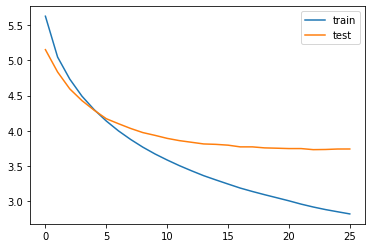

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import AdditiveAttention

# 인코더 설계 시작
embedding_dim = 512
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len_t,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab_t, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab_t, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab_t, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model1 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model1.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 43)]         0           []                               
                                                                                                  
 embedding_18 (Embedding)       (None, 43, 512)      21504000    ['input_25[0][0]']               
                                                                                                  
 lstm_36 (LSTM)                 [(None, 43, 256),    787456      ['embedding_18[0][0]']           
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                           

In [ ]:
model1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=4, verbose=1)
history1 = model1.fit(x=[encoder_input_train_t, decoder_input_train_t], y=decoder_target_train_t, \
          validation_data=([encoder_input_test_t, decoder_input_test_t], decoder_target_test_t), \
          batch_size=256,callbacks=[es], epochs=100)

Epoch 1/100
299/299 [==============================] - 38s 104ms/step - loss: 5.5374 - val_loss: 5.0575
Epoch 2/100
299/299 [==============================] - 29s 98ms/step - loss: 4.8678 - val_loss: 4.5974
Epoch 3/100
299/299 [==============================] - 29s 98ms/step - loss: 4.4816 - val_loss: 4.3608
Epoch 4/100
299/299 [==============================] - 29s 98ms/step - loss: 4.2131 - val_loss: 4.1743
Epoch 5/100
299/299 [==============================] - 29s 98ms/step - loss: 3.9983 - val_loss: 4.0453
Epoch 6/100
299/299 [==============================] - 29s 98ms/step - loss: 3.8153 - val_loss: 3.9531
Epoch 7/100
299/299 [==============================] - 29s 98ms/step - loss: 3.6629 - val_loss: 3.8730
Epoch 8/100
299/299 [==============================] - 29s 98ms/step - loss: 3.5295 - val_loss: 3.8134
Epoch 9/100
299/299 [==============================] - 29s 98ms/step - loss: 3.4127 - val_loss: 3.7713
Epoch 10/100
299/299 [==============================] - 29s 98ms/step - 

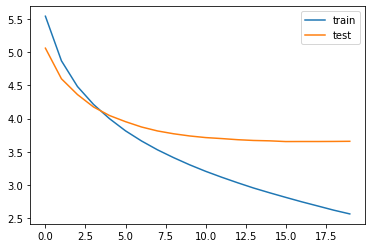

In [ ]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import AdditiveAttention

# 인코더 설계 시작
embedding_dim = 1024
hidden_size = 512

# 인코더
encoder_inputs = Input(shape=(text_max_len_t,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab_t, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab_t, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab_t, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model2 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 43, 1024)     43008000    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 43, 512),    3147776     ['embedding[0][0]']              
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                              

In [ ]:
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model2.fit(x=[encoder_input_train_t, decoder_input_train_t], y=decoder_target_train_t, \
          validation_data=([encoder_input_test_t, decoder_input_test_t], decoder_target_test_t), \
          batch_size=512, callbacks=[es], epochs=50)

Epoch 1/50
150/150 [==============================] - 64s 359ms/step - loss: 5.5705 - val_loss: 5.1122
Epoch 2/50
150/150 [==============================] - 52s 350ms/step - loss: 4.9124 - val_loss: 4.6205
Epoch 3/50
150/150 [==============================] - 53s 350ms/step - loss: 4.4033 - val_loss: 4.2833
Epoch 4/50
150/150 [==============================] - 53s 350ms/step - loss: 4.0009 - val_loss: 3.9963
Epoch 5/50
150/150 [==============================] - 53s 350ms/step - loss: 3.6842 - val_loss: 3.8315
Epoch 6/50
150/150 [==============================] - 52s 350ms/step - loss: 3.4179 - val_loss: 3.7052
Epoch 7/50
150/150 [==============================] - 52s 350ms/step - loss: 3.1876 - val_loss: 3.6223
Epoch 8/50
150/150 [==============================] - 52s 350ms/step - loss: 2.9823 - val_loss: 3.5527
Epoch 9/50
150/150 [==============================] - 52s 350ms/step - loss: 2.7960 - val_loss: 3.5124
Epoch 10/50
150/150 [==============================] - 52s 350ms/step - l

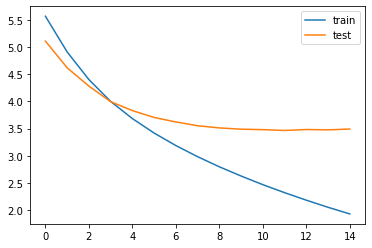

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 텍스트, 요약 10번 이하

In [ ]:
src_vocab_t = 51300
src_vocab_t_1 = 51900
src_vocab_t2 = 51200
src_vocab_t2_1 = 51900
tar_vocab_t = 22600
tar_vocab_t_1 = 22700
tar_vocab_t2 = 22500
tar_vocab_t2_1 = 22800

## 임베딩 128 히든 256

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import AdditiveAttention

# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len_t,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab_t, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab_t, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab_t, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model2 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 43, 128)      6566400     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 43, 256),    394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [ ]:
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model2.fit(x=[encoder_input_train_t, decoder_input_train_t], y=decoder_target_train_t, \
          validation_data=([encoder_input_test_t, decoder_input_test_t], decoder_target_test_t), \
          batch_size=512, callbacks=[es], epochs=50)

Epoch 1/50
150/150 [==============================] - 52s 273ms/step - loss: 5.9047 - val_loss: 5.4087
Epoch 2/50
150/150 [==============================] - 40s 270ms/step - loss: 5.3802 - val_loss: 5.1491
Epoch 3/50
150/150 [==============================] - 41s 276ms/step - loss: 5.0849 - val_loss: 4.8811
Epoch 4/50
150/150 [==============================] - 42s 280ms/step - loss: 4.8238 - val_loss: 4.7082
Epoch 5/50
150/150 [==============================] - 42s 283ms/step - loss: 4.6047 - val_loss: 4.5129
Epoch 6/50
150/150 [==============================] - 43s 285ms/step - loss: 4.4151 - val_loss: 4.4103
Epoch 7/50
150/150 [==============================] - 43s 286ms/step - loss: 4.2506 - val_loss: 4.3105
Epoch 8/50
150/150 [==============================] - 43s 287ms/step - loss: 4.1057 - val_loss: 4.2068
Epoch 9/50
150/150 [==============================] - 43s 288ms/step - loss: 3.9789 - val_loss: 4.1305
Epoch 10/50
150/150 [==============================] - 43s 289ms/step - l

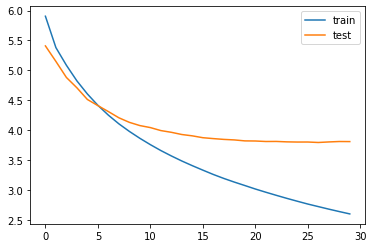

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 임 256 히든 512

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import AdditiveAttention

# 인코더 설계 시작
embedding_dim = 256
hidden_size = 512

# 인코더
encoder_inputs = Input(shape=(text_max_len_t,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab_t, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab_t, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab_t, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model2 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 43, 256)      13132800    ['input_3[0][0]']                
                                                                                                  
 lstm_4 (LSTM)                  [(None, 43, 512),    1574912     ['embedding_2[0][0]']            
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                            

In [ ]:
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model2.fit(x=[encoder_input_train_t, decoder_input_train_t], y=decoder_target_train_t, \
          validation_data=([encoder_input_test_t, decoder_input_test_t], decoder_target_test_t), \
          batch_size=512, callbacks=[es], epochs=50)

Epoch 1/50
150/150 [==============================] - 97s 610ms/step - loss: 5.8176 - val_loss: 5.3156
Epoch 2/50
150/150 [==============================] - 95s 631ms/step - loss: 5.2419 - val_loss: 4.9734
Epoch 3/50
150/150 [==============================] - 96s 640ms/step - loss: 4.8691 - val_loss: 4.6503
Epoch 4/50
150/150 [==============================] - 96s 643ms/step - loss: 4.4989 - val_loss: 4.3957
Epoch 5/50
150/150 [==============================] - 97s 646ms/step - loss: 4.1992 - val_loss: 4.2192
Epoch 6/50
150/150 [==============================] - 97s 648ms/step - loss: 3.9420 - val_loss: 4.0666
Epoch 7/50
150/150 [==============================] - 97s 649ms/step - loss: 3.7159 - val_loss: 3.9670
Epoch 8/50
150/150 [==============================] - 97s 648ms/step - loss: 3.5124 - val_loss: 3.8762
Epoch 9/50
150/150 [==============================] - 97s 648ms/step - loss: 3.3293 - val_loss: 3.8336
Epoch 10/50
150/150 [==============================] - 97s 647ms/step - l

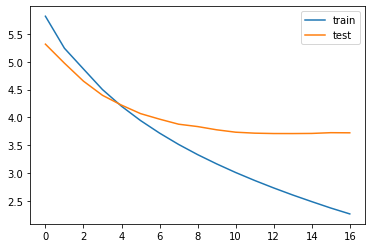

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 임 1024 히 512

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import AdditiveAttention

# 인코더 설계 시작
embedding_dim = 1024
hidden_size = 512

# 인코더
encoder_inputs = Input(shape=(text_max_len_t,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab_t, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab_t, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab_t, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model2 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 43, 1024)     52531200    ['input_5[0][0]']                
                                                                                                  
 lstm_8 (LSTM)                  [(None, 43, 512),    3147776     ['embedding_4[0][0]']            
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                            

In [ ]:
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model2.fit(x=[encoder_input_train_t, decoder_input_train_t], y=decoder_target_train_t, \
          validation_data=([encoder_input_test_t, decoder_input_test_t], decoder_target_test_t), \
          batch_size=512, callbacks=[es], epochs=50)

Epoch 1/50
150/150 [==============================] - 110s 692ms/step - loss: 5.7264 - val_loss: 5.1950
Epoch 2/50
150/150 [==============================] - 108s 718ms/step - loss: 5.0129 - val_loss: 4.6721
Epoch 3/50
150/150 [==============================] - 109s 726ms/step - loss: 4.4933 - val_loss: 4.3254
Epoch 4/50
150/150 [==============================] - 109s 730ms/step - loss: 4.1069 - val_loss: 4.0799
Epoch 5/50
150/150 [==============================] - 110s 733ms/step - loss: 3.7891 - val_loss: 3.9184
Epoch 6/50
150/150 [==============================] - 110s 734ms/step - loss: 3.5219 - val_loss: 3.7911
Epoch 7/50
150/150 [==============================] - 110s 734ms/step - loss: 3.2894 - val_loss: 3.7097
Epoch 8/50
150/150 [==============================] - 110s 734ms/step - loss: 3.0827 - val_loss: 3.6541
Epoch 9/50
150/150 [==============================] - 110s 733ms/step - loss: 2.8923 - val_loss: 3.6374
Epoch 10/50
150/150 [==============================] - 110s 731m

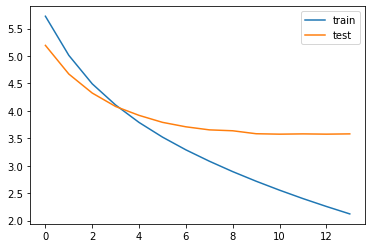

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 텍스트, 요약 20 이하

In [ ]:
src_vocab_t = 56500
src_vocab_t_1 = 57100
src_vocab_t2 = 56400
src_vocab_t2_1 = 57100
tar_vocab_t = 25100
tar_vocab_t_1 = 25300
tar_vocab_t2 = 25000
tar_vocab_t2_1 = 25300

# 임 1024 히 512

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import AdditiveAttention

# 인코더 설계 시작
embedding_dim = 1024
hidden_size = 512

# 인코더
encoder_inputs = Input(shape=(text_max_len_t,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab_t, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab_t, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab_t, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model2 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 43, 1024)     57856000    ['input_7[0][0]']                
                                                                                                  
 lstm_12 (LSTM)                 [(None, 43, 512),    3147776     ['embedding_6[0][0]']            
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                            

In [ ]:
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model2.fit(x=[encoder_input_train_t, decoder_input_train_t], y=decoder_target_train_t, \
          validation_data=([encoder_input_test_t, decoder_input_test_t], decoder_target_test_t), \
          batch_size=512, callbacks=[es], epochs=50)

Epoch 1/50
150/150 [==============================] - 115s 733ms/step - loss: 5.7439 - val_loss: 5.2111
Epoch 2/50
150/150 [==============================] - 114s 758ms/step - loss: 5.0549 - val_loss: 4.7601
Epoch 3/50
150/150 [==============================] - 115s 769ms/step - loss: 4.5774 - val_loss: 4.4046
Epoch 4/50
150/150 [==============================] - 116s 774ms/step - loss: 4.1764 - val_loss: 4.1589
Epoch 5/50
150/150 [==============================] - 116s 775ms/step - loss: 3.8505 - val_loss: 3.9694
Epoch 6/50
150/150 [==============================] - 116s 775ms/step - loss: 3.5728 - val_loss: 3.8484
Epoch 7/50
150/150 [==============================] - 116s 776ms/step - loss: 3.3305 - val_loss: 3.7687
Epoch 8/50
150/150 [==============================] - 118s 787ms/step - loss: 3.1166 - val_loss: 3.7189
Epoch 9/50
150/150 [==============================] - 119s 795ms/step - loss: 2.9208 - val_loss: 3.6721
Epoch 10/50
150/150 [==============================] - 119s 795m

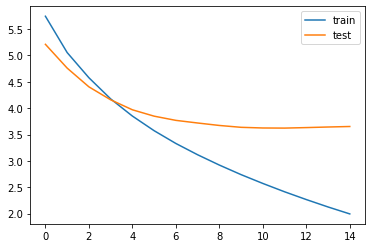

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 텍스트, 요약 15번

In [ ]:
src_vocab_t = 54200
src_vocab_t_1 = 55000
src_vocab_t2 = 54400
src_vocab_t2_1 = 54900
tar_vocab_t = 24100
tar_vocab_t_1 = 24300
tar_vocab_t2 = 24000
tar_vocab_t2_1 = 24300

## 임 1024 히 512

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import AdditiveAttention

# 인코더 설계 시작
embedding_dim = 1024
hidden_size = 512

# 인코더
encoder_inputs = Input(shape=(text_max_len_t,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab_t, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab_t, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab_t, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model2 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 43, 1024)     55500800    ['input_9[0][0]']                
                                                                                                  
 lstm_16 (LSTM)                 [(None, 43, 512),    3147776     ['embedding_8[0][0]']            
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                            

In [ ]:
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model2.fit(x=[encoder_input_train_t, decoder_input_train_t], y=decoder_target_train_t, \
          validation_data=([encoder_input_test_t, decoder_input_test_t], decoder_target_test_t), \
          batch_size=512, callbacks=[es], epochs=50)

Epoch 1/50
150/150 [==============================] - 118s 751ms/step - loss: 5.7367 - val_loss: 5.2110
Epoch 2/50
150/150 [==============================] - 112s 746ms/step - loss: 5.0391 - val_loss: 4.7252
Epoch 3/50
150/150 [==============================] - 112s 745ms/step - loss: 4.5449 - val_loss: 4.3830
Epoch 4/50
150/150 [==============================] - 112s 747ms/step - loss: 4.1512 - val_loss: 4.1136
Epoch 5/50
150/150 [==============================] - 112s 745ms/step - loss: 3.8287 - val_loss: 3.9424
Epoch 6/50
150/150 [==============================] - 112s 746ms/step - loss: 3.5585 - val_loss: 3.8133
Epoch 7/50
150/150 [==============================] - 112s 746ms/step - loss: 3.3218 - val_loss: 3.7441
Epoch 8/50
150/150 [==============================] - 112s 746ms/step - loss: 3.1129 - val_loss: 3.6937
Epoch 9/50
150/150 [==============================] - 112s 746ms/step - loss: 2.9198 - val_loss: 3.6455
Epoch 10/50
150/150 [==============================] - 112s 747m

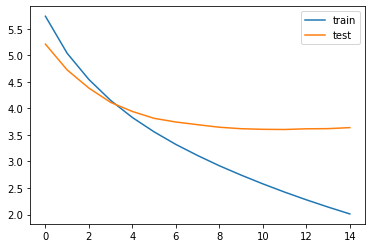

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 일반화 시켜보자~~

In [ ]:
tar_tokenizer_t.word_index.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [ ]:
src_tokenizer_t.word_index.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [ ]:
test_input = encoder_input_train_t.copy()

In [ ]:
train_en_input = encoder_input_train_t.copy()
train_de_input = decoder_input_train_t.copy()
train_de_target = decoder_target_train_t.copy()
test_en_input = encoder_input_test_t.copy()
test_de_input = decoder_input_test_t.copy()
test_de_target = decoder_target_test_t.copy()


In [ ]:
np.max(encoder_input_train_t)

54199

In [ ]:
np.max(decoder_input_train_t)

24099

In [ ]:
np.max(decoder_target_train_t)

24099

In [ ]:
np.max(encoder_input_test_t)

54184

In [ ]:
np.max(decoder_input_test_t)

24094

In [ ]:
np.max(decoder_target_test_t)

24094

In [ ]:
test_input = test_input/54199

In [ ]:
test_input[0]

array([5.53515748e-05, 2.39856824e-04, 4.98164173e-04, 5.33035665e-02,
       9.22526246e-04, 4.35247883e-02, 1.86903817e-02, 2.14026089e-02,
       3.74545656e-03, 1.29153674e-04, 1.42069042e-02, 3.21777155e-02,
       4.50930829e-02, 8.14221665e-02, 2.11627521e-02, 1.60519567e-03,
       1.40888208e-01, 4.50930829e-02, 5.70674736e-02, 8.59794461e-03,
       1.21219949e-02, 8.76399934e-03, 7.91527519e-03, 5.16614698e-04,
       5.90416797e-04, 1.66054724e-04, 1.58674514e-03, 1.66054724e-03,
       2.36166719e-03, 7.74922047e-04, 1.10278787e-01, 1.18083359e-03,
       9.79907378e-02, 3.87461023e-04, 1.03691950e-02, 3.53917969e-01,
       1.56829462e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
train_en_input = encoder_input_train_t / 54199
train_de_input = decoder_input_train_t / 24099
train_de_target = decoder_target_train_t / 24099
test_en_input = encoder_input_test_t / 54184
test_de_input = decoder_input_test_t / 24094
test_de_target = decoder_target_test_t / 24094

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import AdditiveAttention

# 인코더 설계 시작
embedding_dim = 1024
hidden_size = 512

# 인코더
encoder_inputs = Input(shape=(text_max_len_t,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab_t, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab_t, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab_t, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model2 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model2.summary()


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 43)]         0           []                               
                                                                                                  
 embedding_16 (Embedding)       (None, 43, 1024)     55500800    ['input_20[0][0]']               
                                                                                                  
 lstm_32 (LSTM)                 [(None, 43, 512),    3147776     ['embedding_16[0][0]']           
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                           

In [ ]:
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model2.fit(x=[train_en_input, train_de_input], y=train_de_target, \
          validation_data=([test_en_input, test_de_input], test_de_target), \
          batch_size=512, callbacks=[es], epochs=10)

Epoch 1/10
150/150 [==============================] - 116s 737ms/step - loss: 0.1547 - val_loss: 8.5427e-05
Epoch 2/10
150/150 [==============================] - 109s 729ms/step - loss: 2.3953e-05 - val_loss: 8.9613e-05
Epoch 3/10
150/150 [==============================] - 109s 728ms/step - loss: 2.3531e-05 - val_loss: 7.2969e-05
Epoch 4/10
150/150 [==============================] - 109s 729ms/step - loss: 1.9513e-05 - val_loss: 7.6979e-05
Epoch 5/10
150/150 [==============================] - 109s 729ms/step - loss: 2.1123e-05 - val_loss: 6.8652e-05
Epoch 6/10
150/150 [==============================] - 109s 730ms/step - loss: 1.8243e-05 - val_loss: 7.8631e-05
Epoch 7/10
150/150 [==============================] - 109s 730ms/step - loss: 2.0854e-05 - val_loss: 7.2085e-05
Epoch 8/10
150/150 [==============================] - 110s 731ms/step - loss: 2.0511e-05 - val_loss: 6.6402e-05
Epoch 9/10
150/150 [==============================] - 110s 731ms/step - loss: 1.9469e-05 - val_loss: 7.0234e

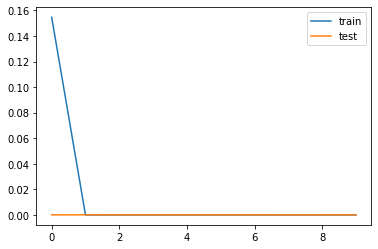

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 예측값 실제값 비교해보기

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
src_index_to_word = src_tokenizer_t.index_word.copy() # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer_t.word_index.copy() # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer_t.index_word.copy() # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

=3


In [ ]:
tar_tokenizer_t.word_index

{'sostoken': 1,
 'eostoken': 2,
 'to': 3,
 'in': 4,
 'for': 5,
 'of': 6,
 'on': 7,
 'with': 8,
 'india': 9,
 'not': 10,
 'after': 11,
 'at': 12,
 'from': 13,
 'us': 14,
 'over': 15,
 'as': 16,
 'by': 17,
 'the': 18,
 'is': 19,
 'man': 20,
 'be': 21,
 'pm': 22,
 'govt': 23,
 'will': 24,
 'up': 25,
 'old': 26,
 'delhi': 27,
 'world': 28,
 'indian': 29,
 'trump': 30,
 'was': 31,
 'bjp': 32,
 'crore': 33,
 'report': 34,
 'cm': 35,
 'st': 36,
 'woman': 37,
 'modi': 38,
 'new': 39,
 'year': 40,
 'his': 41,
 'against': 42,
 'first': 43,
 'who': 44,
 'no': 45,
 'and': 46,
 'have': 47,
 'it': 48,
 'ex': 49,
 'cr': 50,
 'my': 51,
 'day': 52,
 'out': 53,
 'time': 54,
 'pak': 55,
 'mumbai': 56,
 'years': 57,
 'people': 58,
 'yr': 59,
 'film': 60,
 'police': 61,
 'reports': 62,
 'china': 63,
 'sc': 64,
 'case': 65,
 'lakh': 66,
 'ceo': 67,
 'women': 68,
 'do': 69,
 'get': 70,
 'gets': 71,
 'killed': 72,
 'video': 73,
 'me': 74,
 'rahul': 75,
 'its': 76,
 'minister': 77,
 'has': 78,
 'are': 79,
 'st

In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len_t, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len_t-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

=3


In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp



In [ ]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test_t[i]))
    print("실제 요약 :", seq2summary(decoder_input_test_t[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test_t[i].reshape(1, text_max_len_t)))
    print("\n")

원문 : anganwadi workers maharashtra announced plans continue strike despite government announcing raise salaries friday terming raise demanded salary hikes based seniority workers began indefinite strike september demanded higher pays along better quality food anganwadi centres 
실제 요약 : maha continue protest after pay raise 
예측 요약 :  maha govt to pay compensation for demanding pay hike


원문 : one six new ferries australian state new south wales named ferry public vote ferry seemingly derived name boaty mcboatface chosen british public name polar research vessel notably names submitted name ferry competition 
실제 요약 : australia votes to name ferry ferry 
예측 요약 :  australia new zealand top state of sydney passes away


원문 : puppy taken driver delivering amazon parcels uk reunited owner richard emailed ceo jeff bezos puppy returned said amazon employee went driver home found puppy brought back driver would longer deliver packages amazon spokesperson said 
실제 요약 : puppy taken by amazon deliv

In [ ]:
test_en_input[0]

array([3.6656e+04, 3.9270e+03, 6.7360e+03, 9.6100e+02, 4.9210e+03,
       3.7280e+03, 5.2020e+03, 5.5000e+01, 1.0340e+03, 7.5000e+02,
       1.9000e+01, 2.0000e+02, 3.6656e+04, 7.3700e+02, 1.1100e+02,
       2.2560e+03, 1.6260e+03, 6.4000e+02, 1.2000e+01, 6.3700e+02,
       2.0000e+02, 2.2700e+02, 1.2429e+04, 1.3145e+04, 1.7800e+02,
       5.9000e+01, 3.6656e+04, 3.9270e+03, 6.7360e+03, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00])

In [ ]:
train_en_input = train_en_input * 54199
train_de_input = train_de_input * 24099
train_de_target = train_de_target * 24099
test_en_input = test_en_input * 54184
test_de_input = test_de_input * 24094
test_de_target = test_de_target * 24094

In [ ]:
type(test_en_input)

numpy.ndarray

In [ ]:
for i in range(50, 100):
    print("원문 :", seq2text(test_en_input[i]))
    print("실제 요약 :", seq2summary(test_de_input[i]))
    print("예측 요약 :", decode_sequence(test_en_input[i].reshape(1, text_max_len_t)))
    print("\n")

KeyError: ignored

# 다시

In [ ]:
train_en_input = encoder_input_train_t / 54199
train_de_input = decoder_input_train_t / 24099
train_de_target = decoder_target_train_t / 24099
test_en_input = encoder_input_test_t / 54184
test_de_input = decoder_input_test_t / 24094
test_de_target = decoder_target_test_t / 24094

In [ ]:
int(train_en_input[0][0] * 54199)

3

In [ ]:
train_en_input = train_en_input * 54199
train_de_input = train_de_input * 24099
train_de_target = train_de_target * 24099
test_en_input = test_en_input * 54184
test_de_input = test_de_input * 24094
test_de_target = test_de_target * 24094

In [ ]:
after_train_en_input = train_en_input.astype(int)

In [ ]:
after_train_de_input = train_de_input.astype(int)
after_train_de_target = train_de_target.astype(int)
after_test_en_input = test_en_input.astype(int)
after_test_de_input = test_de_input.astype(int)
after_test_de_target = test_de_target.astype(int)

In [ ]:
train_en_input.dtype

dtype('float64')

In [ ]:
train_en_input[1][0]

7212.0

In [ ]:
int(0.999999999998)

0

In [ ]:
after_train_en_input = np.where(train_en_input - after_train_en_input != 0, after_train_en_input + 1 , train_en_input)


In [ ]:
after_train_de_input = np.where(train_de_input - after_train_de_input != 0, after_train_de_input + 1 , train_de_input)
after_train_de_target = np.where(train_de_target - after_train_de_target != 0, after_train_de_target + 1 , train_de_target)
after_test_en_input = np.where(test_en_input - after_test_en_input != 0, after_test_en_input + 1 , test_en_input)
after_test_de_input = np.where(test_de_input - after_test_de_input != 0, after_test_de_input + 1 , test_de_input)
after_test_de_target = np.where(test_de_target - after_test_de_target != 0, after_test_de_target + 1 , test_de_target)


In [ ]:
after_train_en_input[1][0]

7212.0

In [ ]:
for i in range(50, 100):
    print("원문 :", seq2text(after_test_en_input[i]))
    print("실제 요약 :", seq2summary(after_test_de_input[i]))
    print("예측 요약 :", decode_sequence(after_test_en_input[i].reshape(1, text_max_len_t)))
    print("\n")

원문 : anganwadi workers maharashtra announced plans continue strike despite government announcing raise salaries friday terming raise demanded salary hikes based seniority workers began indefinite strike september demanded higher pays along better quality food anganwadi centres 
실제 요약 : maha continue protest after pay raise 
예측 요약 :  maha govt to pay compensation for demanding pay hike


원문 : one six new ferries australian state new south wales named faction public vote faction seemingly derived name boaty mcboatface chosen british public name polar research vessel notably names returns name faction competition 
실제 요약 : australia votes to name pentagon pentagon 
예측 요약 :  australian town to replace new year old australian


원문 : puppy taken driver delivering amazon sulawesi ministry reunited fan richard emailed days jeff bezos puppy returned said amazon employee went driver home found puppy brought back driver would longer deliver packages amazon spokesperson said 
실제 요약 : puppy taken by

# 추출 요약 예시

In [ ]:
pip install summa

     |████████████████████████████████| 54 kB 2.4 MB/s 
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54412 sha256=2e694ea5d941633fdeda583821701457fd42f13eba33690f3335b99174f4a3d7
  Stored in directory: /root/.cache/pip/wheels/29/64/ac/7b443477588d365ef37ada30d456bdf5f07dc5be9f6324cb6e
Successfully built summa


In [ ]:
import requests
from summa.summarizer import summarize

In [ ]:

import nltk
import tensorflow
import summa

print(nltk.__version__)
print(tensorflow.__version__)

3.2.5
2.8.0


In [ ]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [ ]:
type(text)

str

In [ ]:
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [ ]:
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [ ]:
import chardet

In [ ]:
print(chardet.detect(text.encode()))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


# 추출 요약 시작~

In [ ]:
#깃헙 기준
data1 = pd.read_csv("news_summary_more.csv", encoding='utf-8')
#구글 코랩 기준
#data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/news_summary_more.csv", encoding='utf-8')
temp = list(data1['text'])
temp[:1500]

["Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.",
 "Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.",
 "New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The ma

In [ ]:
type(temp)

list

In [ ]:
print(chardet.detect(temp.encode()))

AttributeError: ignored

In [ ]:
temp = "".join(temp)

In [ ]:
type(temp)

str

In [ ]:
print(chardet.detect(temp.encode()))

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [ ]:
temp[0]

'S'

In [ ]:
temp[:1500]

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The match witness

In [ ]:
len(temp)

35120069

In [ ]:
print('Summary:')
print(summarize(temp[:50000], ratio=0.1, split = True))

Summary:
['Also, customers have options to insure against Critical Illnesses, Disability and Accidental Death Benefit Rider with a life cover up to the age of 80 years.Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, "I\'ve known Hirani for many years...What if it\'s not true, the [#MeToo] movement will get derailed." "In the #MeToo movement, I always believe a woman.', 'The fashion show, which began on January 29, will continue till February 3.In a jibe at Congress President Rahul Gandhi, PM Narendra Modi on Wednesday said those on "bail will have to go to jail." PM Modi added, "He is out on bail and his associates too are facing charges...I know they will be convicted one day." The PM claimed he\'d waged a war on corruption because he\'s from a common household.', 'Days after he threatened to step down from his post if Congress MLAs continue "crossing the line," Karnataka Chief Minister HD Kumaraswamy accused them of taking potshots and ask

In [ ]:
print('Summary:')
print(summarize(temp[:5000], words=30))

Summary:
India's previous lowest ODI total in New Zealand was 108.Weeks after ex-CBI Director Alok Verma told the Department of Personnel and Training to consider him retired, the Home Ministry asked him to join work on the last day of his fixed tenure as Director on Thursday.


In [ ]:
print('Summary:')
for i in range(50):
  print(summarize(temp[:1000], words=i), i)

Summary:
 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21
 22
 23
 24
Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. 25
Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. 26
Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. 27
Users get one CRED coin per rupee of bil

In [ ]:
print('Summary:')
for i in range(50):
  print(summarize(temp[:10000], words=i), i)

Summary:
 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21
 22
 23
 24
 25
 26
 27
 28
 29
 30
 31
 32
 33
 34
 35
 36
 37
 38
 39
 40
 41
 42
 43
 44
He added, "The time has come for the people of Odisha to put a full stop to their activities...The time has come for us to ask for an explanation from this corrupt government."Claiming there is a dearth of ideas among opposition parties, Prime Minister Narendra Modi on Wednesday said, "The opposition talks only about Modi the whole day, I suspect they even dream about me." PM Modi, who was addressing the New India Youth Conclave inâ Surat, added that the opposition parties have only one agenda which is "Modi". 45
He added, "The time has come for the people of Odisha to put a full stop to their activities...The time has come for us to ask for an explanation from this corrupt government."Claiming there is a dearth of ideas among opposition parties, Prime Minister Narendra Modi on Wednesday said, "The oppositio

# 결론 : 추출은 추론보다 쉽지만 나오는 요약이 일정 단어 수 이상부터 나온다.

# 그리고 둘다 내가 원하는 문장을 뽑기에는 많은 노력이 필요하다.

# 그리고 추출기법의 확실한 결과를 볼려고 엑셀 파일의 'text' 내용을 전부 요약하려고 했는데 코랩기준으로 2시간이 넘게 결과를 내주기 않아서 포기했다.

# 일반화를 하면 로스값이 무진장 줄지만 값을 확인해 보니 그대로 였다.